# I. Modélisation statistique

In [1127]:
# !pip install s3fs
# !pip install pandas
# !pip install scikit-learn==1.2.2
# !pip install imbalanced-learn
# !pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [1128]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("data/bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     88       2             0  ...   
22002                8621                     38       0             0  ...   
22003                3028                     49       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 31 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [1129]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
an                                      int64
p_pop                                   int64
CSP_maire                         

In [1130]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [1131]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
an                                       int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [1132]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
an                                    0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0


### C) Séparation de la variable à expliquer et des variables explicatives

In [1133]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [1134]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [1135]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1207, 32)
Dimensions de y: (1207,)


In [1136]:
# import numpy as np

# np.unique(y)

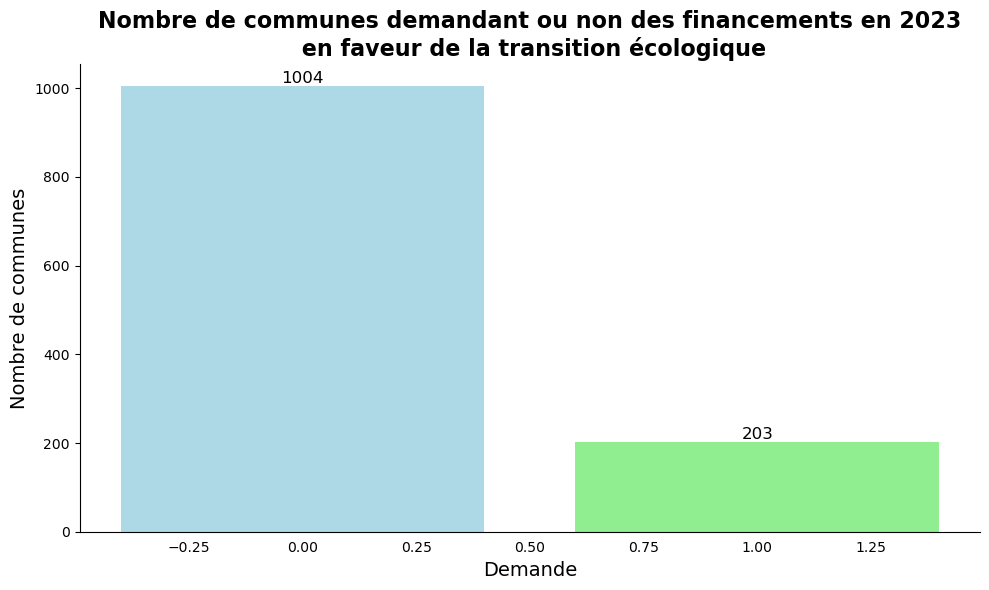

In [1137]:
import matplotlib.pyplot as plt

# Compter le nombre de bénéficiaires et non bénéficiaires
counts = y.value_counts()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=["lightblue", "lightgreen"])

# Titre du graphique
plt.title("Nombre de communes demandant ou non des financements en 2023\n en faveur de la transition écologique", fontsize=16, weight='bold')

# Labels des axes
plt.xlabel("Demande", fontsize=14)
plt.ylabel("Nombre de communes", fontsize=14)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Supprimer les axes inutiles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Supprimer les graduations de l'axe des abscisses
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)

# Afficher le graphique
plt.tight_layout()
plt.show()


## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [1138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [1139]:
X_train.shape, y_train.shape

((965, 32), (965,))

In [1140]:
X_test.shape, y_test.shape

((242, 32), (242,))

In [1141]:
import numpy as np

# Calcul de la proportion de 1 dans y_train et y_test
print("Proportion de 1 dans X_train : ", round(np.sum(y_train == 1)/len(y_train),2)*100, "%")
print("Proportion de 0 dans X_train : ", round(np.sum(y_train == 0)/len(y_train),2)*100, "%")

print("Proportion de 1 dans X_test : ", round(np.sum(y_test == 1)/len(y_test),2)*100, "%")
print("Proportion de 0 dans X_test : ", round(np.sum(y_test == 0)/len(y_test),2)*100, "%")

Proportion de 1 dans X_train :  17.0 %
Proportion de 0 dans X_train :  83.0 %
Proportion de 1 dans X_test :  15.0 %
Proportion de 0 dans X_test :  85.0 %


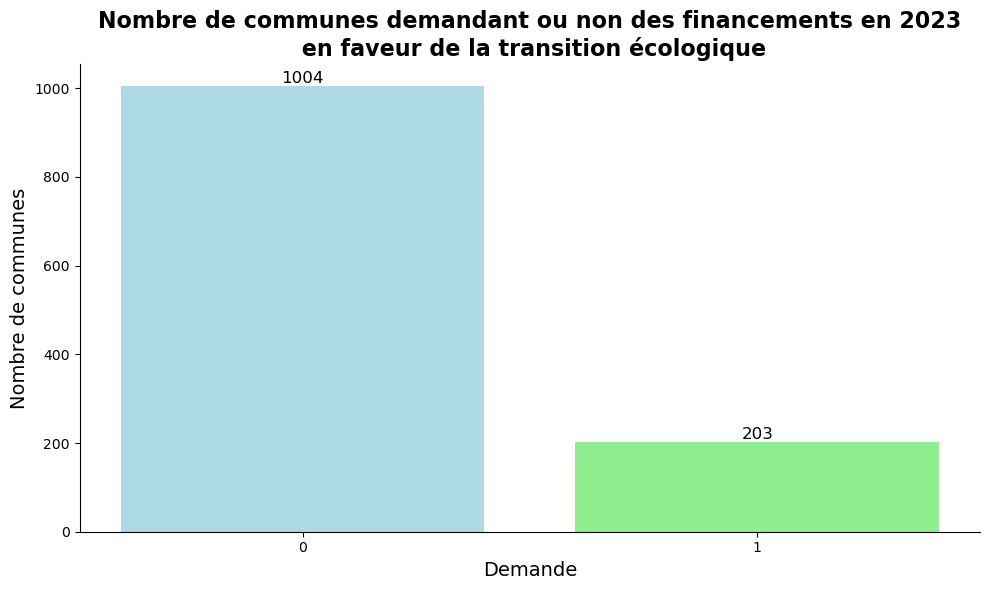

In [1315]:
import matplotlib.pyplot as plt

# Compter le nombre de bénéficiaires et non bénéficiaires
counts = y.value_counts()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=["lightblue", "lightgreen"])

# Titre du graphique
plt.title("Nombre de communes demandant ou non des financements en 2023\n en faveur de la transition écologique", fontsize=16, weight='bold')

# Labels des axes
plt.xlabel("Demande", fontsize=14)
plt.ylabel("Nombre de communes", fontsize=14)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Supprimer les axes inutiles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Graduer axes abscisses de 1 en 1
plt.gca().set_xticks([0, 1])

# Afficher le graphique
plt.tight_layout()

# Export 
plt.savefig('data/variable_a_expliquer.png')

plt.show()

In [1143]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10)

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [1144]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression(random_state=42)) # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression(random_state=42))

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [1145]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(random_state=42))])

On cherche à prédire de nouvelles données grâce aux données test

In [1146]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [1147]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [1148]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [1149]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [1150]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [1151]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

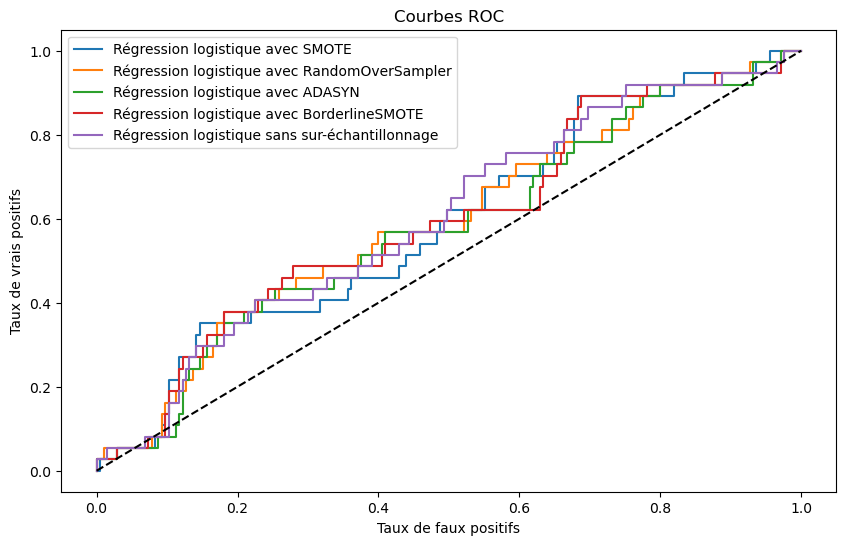

In [1152]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image 
plt.savefig('data/Courbes_ROC_reg_log.png')

plt.show()

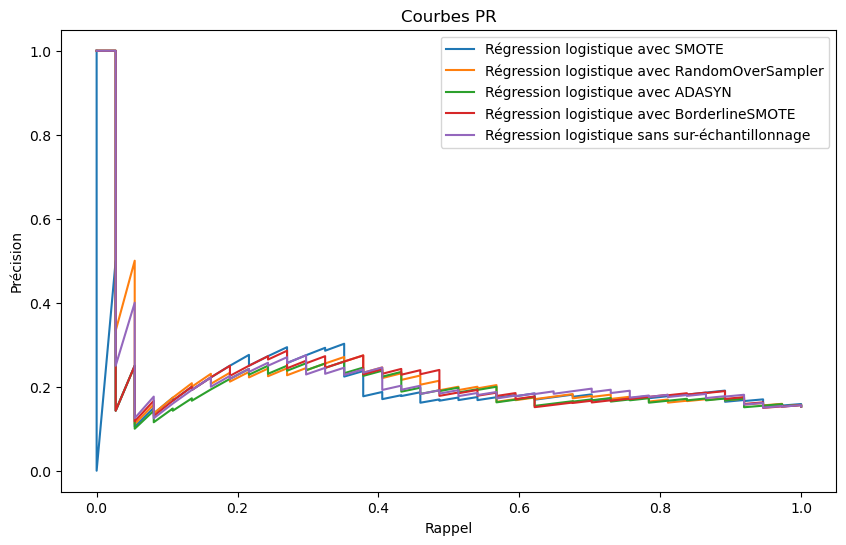

In [1153]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [1154]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, f1_reg_log,  balanced_acc_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, f1_reg_log_smote, balanced_acc_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler,  f1_reg_log_oversampler, balanced_acc_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, f1_reg_log_adasyn, balanced_acc_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote,  f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.600   
AUC-PR                                                      0.228   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.589   
AUC-PR                                        0.210   
F1-score                                      0.260   
Balanced accuracy                             0.542   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.593   
AUC-PR                                                    0.231   
F1-score                                                  0.188   
Balanced accuracy                                         0.530   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.579   
AUC-PR                                         0.217   
F1-score                                       0.273   
Balanced accuracy                              0.554   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.595  
AUC-PR                                                  0.227  
F1-score                                                0.283  
Balanced accuracy                                       0.568

In [1155]:
# Export des résultats en lateX

# Export des résultats
resultats_reg_log.to_csv("data/resultats_reg_log.csv", index=True)
latex_table_reg_log = resultats_reg_log.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.600000 & 0.589000 & 0.593000 & 0.579000 & 0.595000 \\
AUC-PR & 0.228000 & 0.210000 & 0.231000 & 0.217000 & 0.227000 \\
F1-score & 0.050000 & 0.260000 & 0.188000 & 0.273000 & 0.283000 \\
Balanced accuracy & 0.509000 & 0.542000 & 0.530000 & 0.554000 & 0.568000 \\
\bottomrule
\end{tabular}



### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [1156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Grilles de paramètres réduites pour éviter le surapprentissage
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [3, 5, 7],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2'],
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des RandomizedSearchCV pour chaque pipeline avec des grilles réduites
grille_recherche_reg_log_oversampler = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_smote = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_adasyn = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_borderline_smote = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log = RandomizedSearchCV(
    estimator=modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [1157]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1158]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1159]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1160]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1161]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [1162]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log',
                 LogisticRegression(C=0.1, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=3, sampling_strategy=0.75)),
                ('reg_log',
                 LogisticRegression(C=100, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=100, random_state=42, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bor

In [1163]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log',
                 LogisticRegression(C=0.1, random_state=42, solver='saga'))])

In [1164]:
modele_reg_log_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=3, sampling_strategy=0.75)),
                ('reg_log',
                 LogisticRegression(C=100, random_state=42, solver='saga'))])

In [1165]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=100, random_state=42, solver='saga'))])

In [1166]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, random_state=42, solver='saga'))])

In [1167]:
modele_reg_log_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log',
                 LogisticRegression(C=100, random_state=42, solver='saga'))])

In [1168]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [1169]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [1170]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [1171]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [1172]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [1173]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [1174]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv,],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]},
    index = ["AUC-ROC", "AUC-PR", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.589   
AUC-PR                                                      0.227   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.584   
AUC-PR                                        0.229   
F1-score                                      0.297   
Balanced accuracy                             0.583   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.597   
AUC-PR                                                    0.222   
F1-score                                                  0.268   
Balanced accuracy                                         0.552   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.579   
AUC-PR                                         0.222   
F1-score                                       0.294   
Balanced accuracy                              0.578   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.597  
AUC-PR                                                  0.234  
F1-score                                                0.273  
Balanced accuracy                                       0.555

In [1175]:
# Export des résultats
resultats_reg_log_cv.to_csv("data/resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.589000 & 0.584000 & 0.597000 & 0.579000 & 0.597000 \\
AUC-PR & 0.227000 & 0.229000 & 0.222000 & 0.222000 & 0.234000 \\
F1-score & 0.050000 & 0.297000 & 0.268000 & 0.294000 & 0.273000 \\
Balanced accuracy & 0.509000 & 0.583000 & 0.552000 & 0.578000 & 0.555000 \\
\bottomrule
\end{tabular}



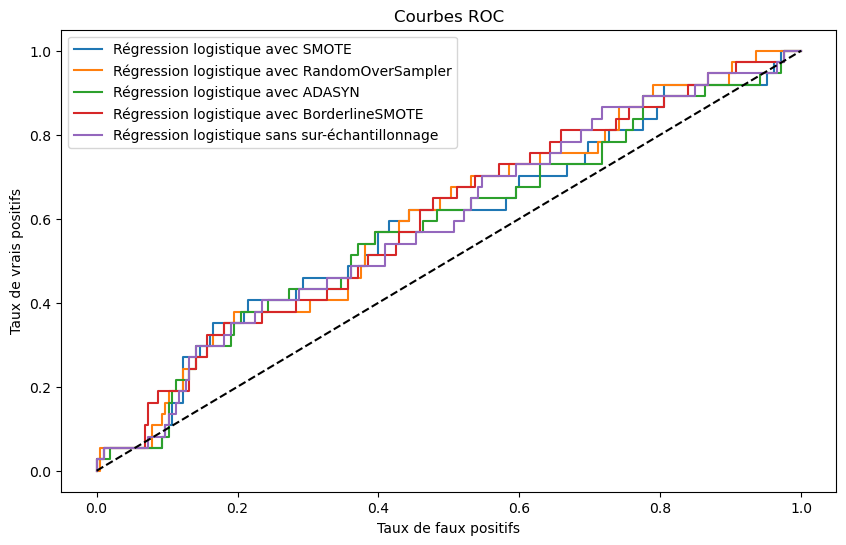

In [1176]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()



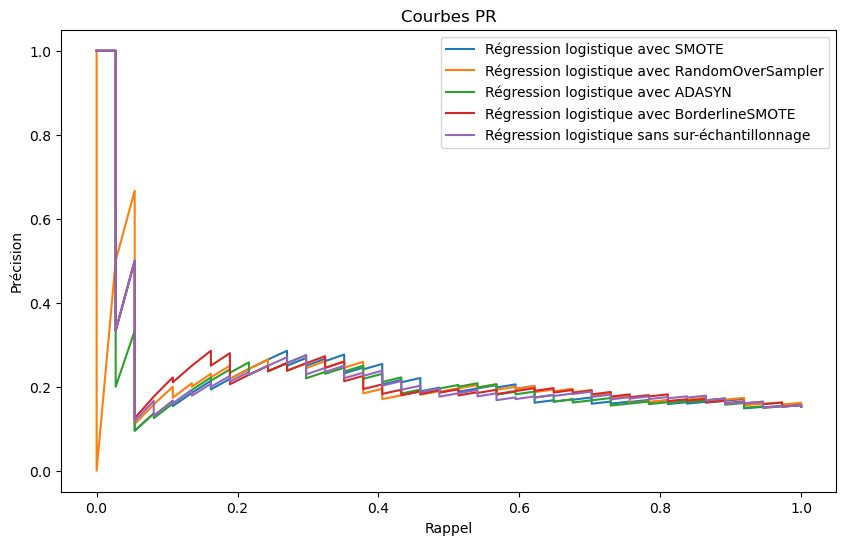

In [1177]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [1178]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.658327
18                               p_pop     0.185139
24              abstention_municipales     0.184451
6                nb_actes_france_renov     0.170260
31                          climat_Mer     0.125014
27             part_licencies_sportifs     0.100533
30                     climat_Estuaire     0.097635
26                   total_entreprises     0.088738
14                            gare_tgv     0.046414
21                       part_inactifs     0.045444
1              moyenne_conso_indus_hab     0.040535
19                           CSP_maire     0.024925
23                      dependance_eco     0.018095
15                part_trajets_voiture     0.009035
17                                  an     0.000000
8                         ecoquartiers    -0.002995
28            part_jeunes_sans_diplome    -0.009065
4             moyenne_conso_totale_hab    -0.009658
20  com_variation_encours_dette_ha_pct    -0.022174
2          moyenne_conso_tertiaire_hab    -0.027164
3        moyenne_conso_residentiel_hab    -0.057662
7                               friche    -0.058002
0               moyenne_conso_agri_hab    -0.059224
25                   taux_creation_ent    -0.067505
10                   beneficiaire_prog    -0.127712
29                        climat_Autre    -0.146846
22                         part_actifs    -0.182974
13                         departement    -0.183633
16                            med_disp    -0.194236
11                            gridens7    -0.263091
9          part_residences_secondaires    -0.397090
5                        emissions_ges    -0.584349

In [1179]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.475042
24              abstention_municipales     0.188842
18                               p_pop     0.138564
27             part_licencies_sportifs     0.119631
31                          climat_Mer     0.101927
6                nb_actes_france_renov     0.101185
21                       part_inactifs     0.084150
26                   total_entreprises     0.067287
1              moyenne_conso_indus_hab     0.055384
30                     climat_Estuaire     0.052880
2          moyenne_conso_tertiaire_hab     0.047692
14                            gare_tgv     0.038120
4             moyenne_conso_totale_hab     0.037662
0               moyenne_conso_agri_hab     0.037558
15                part_trajets_voiture     0.035680
20  com_variation_encours_dette_ha_pct     0.032299
8                         ecoquartiers     0.012799
7                               friche     0.001747
17                                  an     0.000000
19                           CSP_maire    -0.038514
25                   taux_creation_ent    -0.044797
23                      dependance_eco    -0.052238
28            part_jeunes_sans_diplome    -0.057472
9          part_residences_secondaires    -0.068790
10                   beneficiaire_prog    -0.095007
13                         departement    -0.107421
29                        climat_Autre    -0.113135
3        moyenne_conso_residentiel_hab    -0.143312
16                            med_disp    -0.161289
22                         part_actifs    -0.168097
11                            gridens7    -0.284086
5                        emissions_ges    -0.440774

In [1180]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.587219
6                nb_actes_france_renov     0.197509
18                               p_pop     0.172028
24              abstention_municipales     0.163005
27             part_licencies_sportifs     0.123269
15                part_trajets_voiture     0.101034
31                          climat_Mer     0.095884
21                       part_inactifs     0.082169
26                   total_entreprises     0.057762
1              moyenne_conso_indus_hab     0.048192
30                     climat_Estuaire     0.032078
19                           CSP_maire     0.010605
20  com_variation_encours_dette_ha_pct     0.007007
2          moyenne_conso_tertiaire_hab     0.004509
8                         ecoquartiers     0.003587
4             moyenne_conso_totale_hab     0.000100
17                                  an     0.000000
14                            gare_tgv    -0.015571
0               moyenne_conso_agri_hab    -0.028269
7                               friche    -0.033354
23                      dependance_eco    -0.063714
28            part_jeunes_sans_diplome    -0.075315
25                   taux_creation_ent    -0.085482
29                        climat_Autre    -0.102069
3        moyenne_conso_residentiel_hab    -0.120814
10                   beneficiaire_prog    -0.133514
13                         departement    -0.157591
16                            med_disp    -0.191562
22                         part_actifs    -0.218904
9          part_residences_secondaires    -0.234338
11                            gridens7    -0.268794
5                        emissions_ges    -0.576328

In [1181]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.331085
24              abstention_municipales     0.180576
31                          climat_Mer     0.123116
7                               friche     0.081743
27             part_licencies_sportifs     0.068629
14                            gare_tgv     0.066763
15                part_trajets_voiture     0.061492
21                       part_inactifs     0.042954
8                         ecoquartiers     0.030727
23                      dependance_eco     0.029545
30                     climat_Estuaire     0.026150
28            part_jeunes_sans_diplome     0.024246
19                           CSP_maire     0.023580
2          moyenne_conso_tertiaire_hab     0.022483
6                nb_actes_france_renov     0.006877
0               moyenne_conso_agri_hab     0.006315
17                                  an     0.000000
1              moyenne_conso_indus_hab    -0.000639
20  com_variation_encours_dette_ha_pct    -0.012017
18                               p_pop    -0.013247
4             moyenne_conso_totale_hab    -0.019566
26                   total_entreprises    -0.048320
5                        emissions_ges    -0.049538
16                            med_disp    -0.067767
25                   taux_creation_ent    -0.103663
22                         part_actifs    -0.109863
9          part_residences_secondaires    -0.116908
13                         departement    -0.119909
3        moyenne_conso_residentiel_hab    -0.121864
29                        climat_Autre    -0.127347
10                   beneficiaire_prog    -0.128017
11                            gridens7    -0.139772

In [1182]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.454439
24              abstention_municipales     0.156733
14                            gare_tgv     0.101521
27             part_licencies_sportifs     0.094971
18                               p_pop     0.094115
31                          climat_Mer     0.079347
30                     climat_Estuaire     0.064366
6                nb_actes_france_renov     0.050834
7                               friche     0.048606
15                part_trajets_voiture     0.037055
0               moyenne_conso_agri_hab     0.036081
21                       part_inactifs     0.035406
2          moyenne_conso_tertiaire_hab     0.034143
26                   total_entreprises     0.032495
19                           CSP_maire     0.025874
28            part_jeunes_sans_diplome     0.013747
1              moyenne_conso_indus_hab     0.011965
20  com_variation_encours_dette_ha_pct     0.002693
8                         ecoquartiers     0.001764
4             moyenne_conso_totale_hab     0.000038
17                                  an     0.000000
23                      dependance_eco    -0.025935
25                   taux_creation_ent    -0.071709
10                   beneficiaire_prog    -0.087859
13                         departement    -0.089563
16                            med_disp    -0.091395
29                        climat_Autre    -0.093795
3        moyenne_conso_residentiel_hab    -0.123003
11                            gridens7    -0.162875
22                         part_actifs    -0.181394
9          part_residences_secondaires    -0.196976
5                        emissions_ges    -0.304920

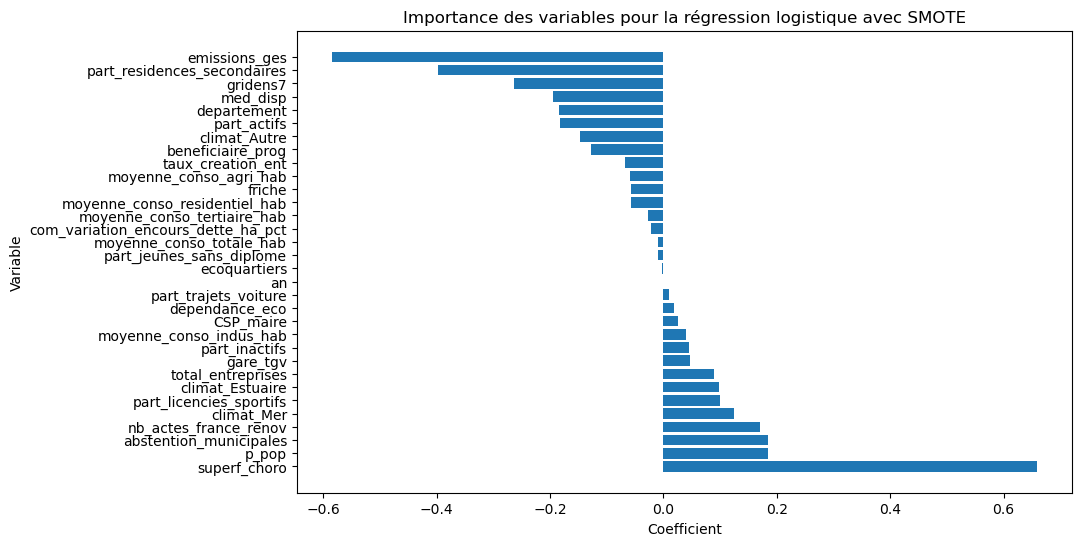

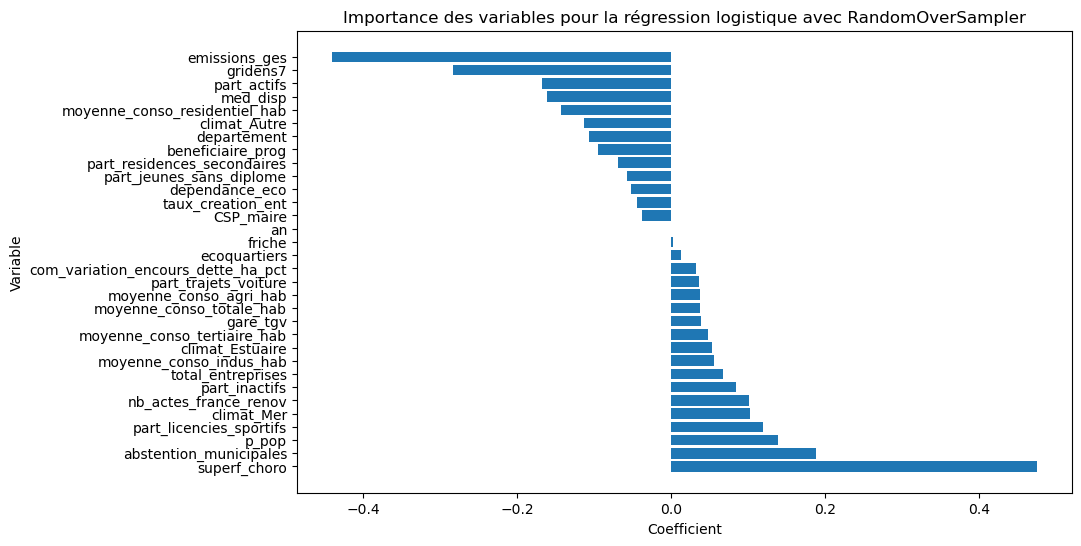

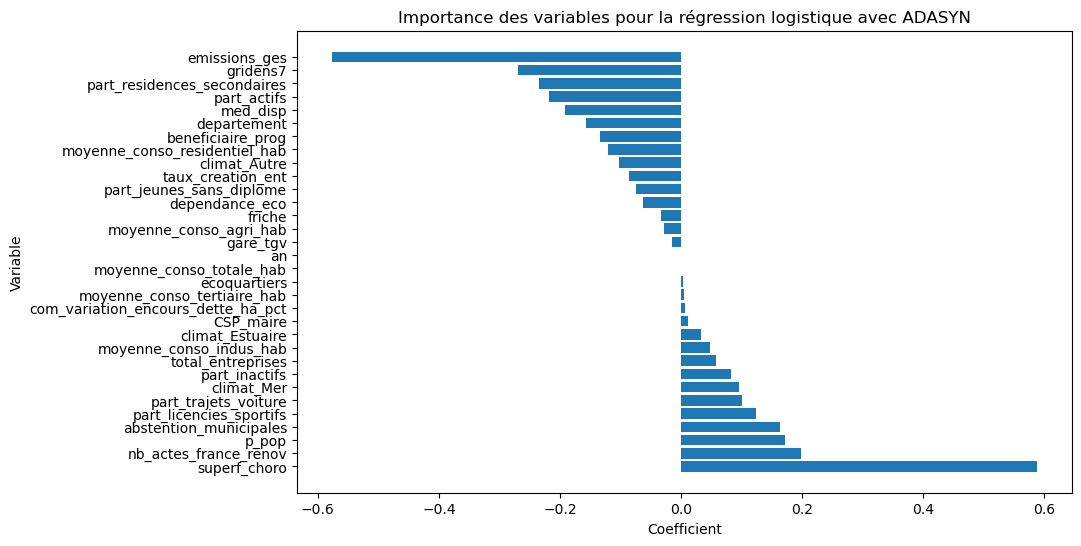

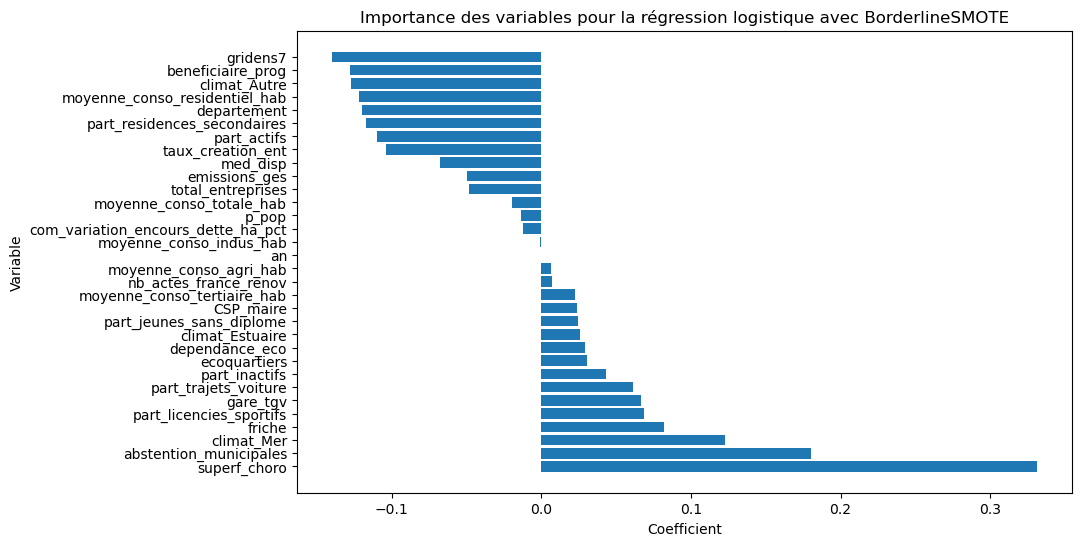

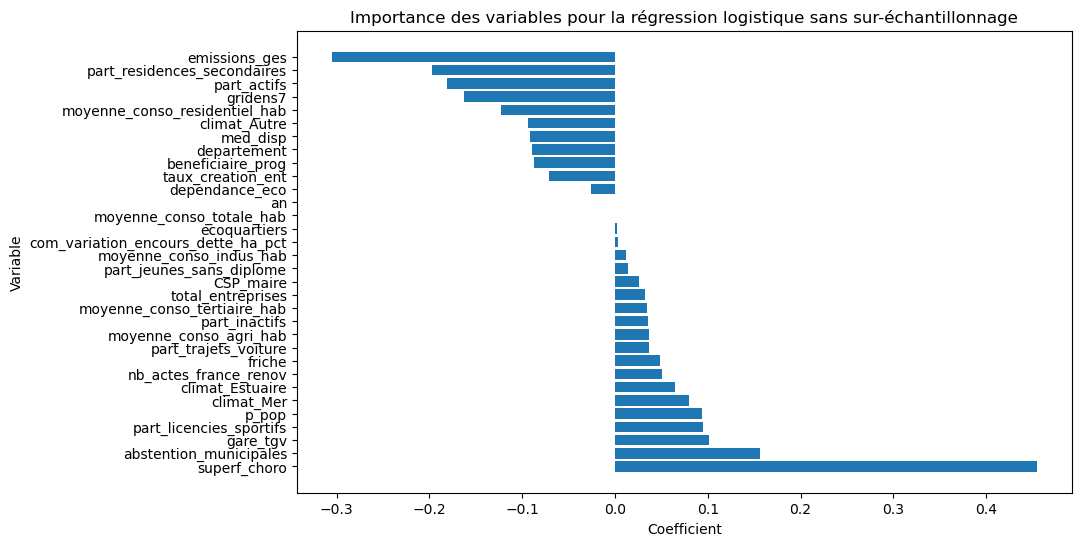

In [1183]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

### F) Deuxième ajustement des hyperparamètres

In [1184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Grilles de paramètres réduites pour éviter le surapprentissage
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [5, 7],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10]
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [5, 7],
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2'],
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.001, 0.01, 0.1, 1, 10],
    'reg_log__penalty': ['l2', None],
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des RandomizedSearchCV pour chaque pipeline avec des grilles réduites
grille_recherche_reg_log_oversampler_bis = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_smote_bis = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_adasyn_bis = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_borderline_smote_bis = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grille_recherche_reg_log_bis = RandomizedSearchCV(
    estimator=modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit='F1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [1185]:
modele_reg_log_oversampler_opt_bis = grille_recherche_reg_log_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_smote_opt_bis = grille_recherche_reg_log_smote_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_adasyn_opt_bis = grille_recherche_reg_log_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_borderline_smote_opt_bis = grille_recherche_reg_log_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_reg_log_opt_bis = grille_recherche_reg_log_bis.fit(X_train, y_train).best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [1186]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt_bis.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt_bis.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt_bis.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt_bis.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt_bis.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt_bis.predict(X_test)


### G) Mesure performances bis

In [1187]:
# Calcul des métriques pour chaque modèle   

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)

auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)

auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)

auc_roc_reg_log_borderline_smote_cv = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote_cv = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)

auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)

# Affichage des résultats
resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote_cv, f1_reg_log_borderline_smote_cv, balanced_acc_reg_log_borderline_smote_cv]},
    index = ["AUC-ROC", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.589   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.583   
F1-score                                      0.275   
Balanced accuracy                             0.558   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.594   
F1-score                                                  0.279   
Balanced accuracy                                         0.563   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.577   
F1-score                                       0.298   
Balanced accuracy                              0.581   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.594  
F1-score                                                0.256  
Balanced accuracy                                       0.537

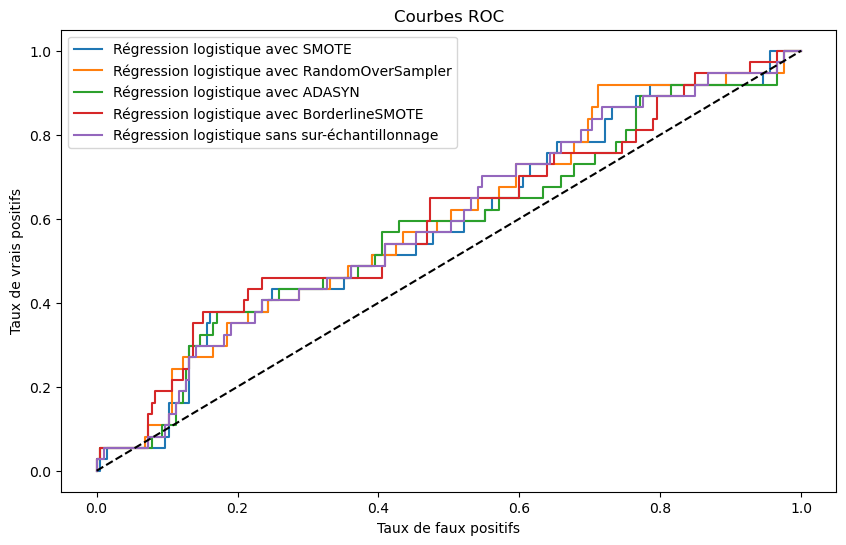

In [1188]:
# Courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log_cv, tpr_reg_log_cv, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log_cv, tpr_reg_log_cv, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()

## I.2.3. Arbres de décision

### A) Construction des modèles

In [1189]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5, random_state=42)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [1190]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [1191]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [1192]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [1193]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [1194]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [1195]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [1196]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [1197]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, f1_arbre, balanced_acc_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, f1_arbre_smote, balanced_acc_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, f1_arbre_oversampler, balanced_acc_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, f1_arbre_adasyn, balanced_acc_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, f1_arbre_borderline_smote, balanced_acc_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.647   
AUC-PR                                                  0.237   
F1-score                                                0.203   
Balanced accuracy                                       0.542   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.620   
AUC-PR                                    0.208   
F1-score                                  0.300   
Balanced accuracy                         0.586   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.603   
AUC-PR                                                0.192   
F1-score                                              0.105   
Balanced accuracy                                     0.499   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.553   
AUC-PR                                     0.172   
F1-score                                   0.248   
Balanced accuracy                          0.524   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.589  
AUC-PR                                              0.213  
F1-score                                            0.284  
Balanced accuracy                                   0.563

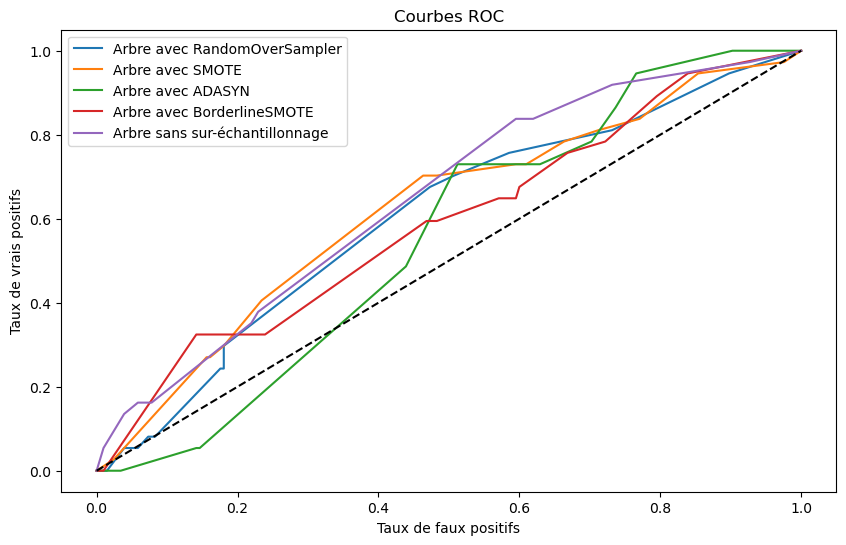

In [1198]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Sauvegarde et export de l'image
plt.savefig('data/Courbes_ROC_arbres.png')

plt.show()



### C) Ajustement des hyperparamètres

In [1199]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}
param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15, 21, 27],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [2, 5, 10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [1, 2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1200]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_smote = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_adasyn = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_borderline_smote = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre = RandomizedSearchCV(modele_arbre, param_grid_arbres, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)

In [1201]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1202]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1203]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

In [1204]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1205]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [1206]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [1207]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [1208]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv,  f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv ],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv


Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.578   
AUC-PR                                                  0.210   
F1                                                      0.278   
Balanced Accuracy                                       0.574   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.614   
AUC-PR                                    0.188   
F1                                        0.265   
Balanced Accuracy                         0.563   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.532   
AUC-PR                                                0.179   
F1                                                    0.232   
Balanced Accuracy                                     0.509   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.532   
AUC-PR                                     0.164   
F1                                         0.179   
Balanced Accuracy                          0.512   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.605  
AUC-PR                                              0.224  
F1                                                  0.302  
Balanced Accuracy                                   0.586

In [1209]:
# Export
resultats_arbres_cv.to_csv("data/resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)

\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.578000 & 0.614000 & 0.532000 & 0.532000 & 0.605000 \\
AUC-PR & 0.210000 & 0.188000 & 0.179000 & 0.164000 & 0.224000 \\
F1 & 0.278000 & 0.265000 & 0.232000 & 0.179000 & 0.302000 \\
Balanced Accuracy & 0.574000 & 0.563000 & 0.509000 & 0.512000 & 0.586000 \\
\bottomrule
\end{tabular}



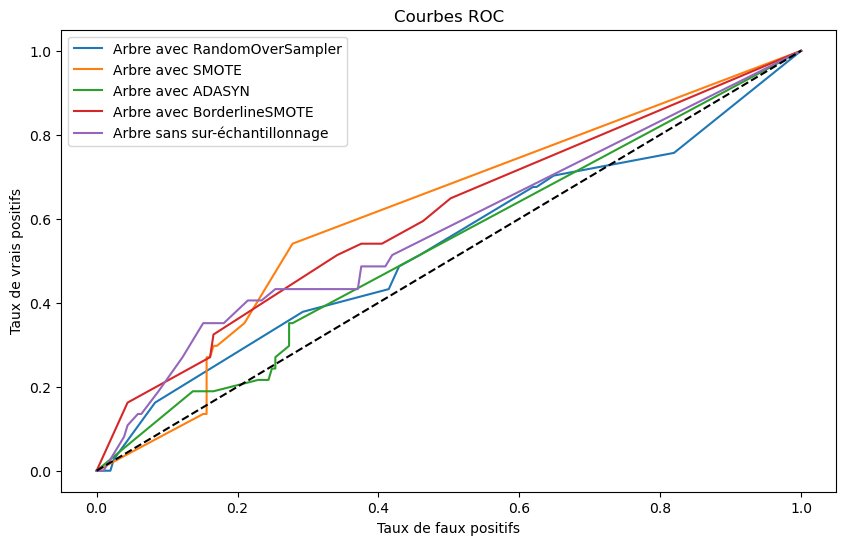

In [1210]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

### E) Importance des variables

In [1211]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
18                               p_pop    0.198771
5                        emissions_ges    0.152381
4             moyenne_conso_totale_hab    0.116983
16                            med_disp    0.098857
20  com_variation_encours_dette_ha_pct    0.075382
19                           CSP_maire    0.066638
27             part_licencies_sportifs    0.055354
0               moyenne_conso_agri_hab    0.042201
22                         part_actifs    0.041817
21                       part_inactifs    0.039245
25                   taux_creation_ent    0.037164
28            part_jeunes_sans_diplome    0.034029
15                part_trajets_voiture    0.030271
24              abstention_municipales    0.010908
8                         ecoquartiers    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
26                   total_entreprises    0.000000
23                      dependance_eco    0.000000
3        moyenne_conso_residentiel_hab    0.000000
9          part_residences_secondaires    0.000000
6                nb_actes_france_renov    0.000000
7                               friche    0.000000
17                                  an    0.000000
1              moyenne_conso_indus_hab    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
31                          climat_Mer    0.000000

In [1212]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.132011
1              moyenne_conso_indus_hab    0.089592
25                   taux_creation_ent    0.071052
27             part_licencies_sportifs    0.060078
4             moyenne_conso_totale_hab    0.057394
16                            med_disp    0.048670
28            part_jeunes_sans_diplome    0.048201
5                        emissions_ges    0.046827
19                           CSP_maire    0.044566
20  com_variation_encours_dette_ha_pct    0.042468
12                        superf_choro    0.039659
18                               p_pop    0.038668
21                       part_inactifs    0.035907
6                nb_actes_france_renov    0.030905
9          part_residences_secondaires    0.029975
11                            gridens7    0.029179
3        moyenne_conso_residentiel_hab    0.028569
13                         departement    0.021317
22                         part_actifs    0.018324
24              abstention_municipales    0.017633
23                      dependance_eco    0.015983
2          moyenne_conso_tertiaire_hab    0.015499
15                part_trajets_voiture    0.013654
0               moyenne_conso_agri_hab    0.013608
14                            gare_tgv    0.006042
26                   total_entreprises    0.004219
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [1213]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
7                               friche    0.216475
1              moyenne_conso_indus_hab    0.109202
13                         departement    0.058653
22                         part_actifs    0.055571
25                   taux_creation_ent    0.055305
20  com_variation_encours_dette_ha_pct    0.052246
15                part_trajets_voiture    0.049701
24              abstention_municipales    0.035863
27             part_licencies_sportifs    0.031903
21                       part_inactifs    0.030585
28            part_jeunes_sans_diplome    0.030272
6                nb_actes_france_renov    0.026817
2          moyenne_conso_tertiaire_hab    0.024990
3        moyenne_conso_residentiel_hab    0.024548
19                           CSP_maire    0.022388
4             moyenne_conso_totale_hab    0.022169
16                            med_disp    0.021667
26                   total_entreprises    0.020201
9          part_residences_secondaires    0.018743
18                               p_pop    0.016009
5                        emissions_ges    0.015890
0               moyenne_conso_agri_hab    0.015464
23                      dependance_eco    0.015061
12                        superf_choro    0.011999
30                     climat_Estuaire    0.007312
11                            gridens7    0.005552
8                         ecoquartiers    0.005413
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
29                        climat_Autre    0.000000
31                          climat_Mer    0.000000

In [1214]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.183667
13                         departement    0.137229
19                           CSP_maire    0.089979
11                            gridens7    0.082062
18                               p_pop    0.075293
16                            med_disp    0.052257
25                   taux_creation_ent    0.047791
3        moyenne_conso_residentiel_hab    0.045685
21                       part_inactifs    0.039620
2          moyenne_conso_tertiaire_hab    0.027559
27             part_licencies_sportifs    0.024320
22                         part_actifs    0.023330
23                      dependance_eco    0.020578
5                        emissions_ges    0.020459
26                   total_entreprises    0.019097
6                nb_actes_france_renov    0.018472
24              abstention_municipales    0.018235
28            part_jeunes_sans_diplome    0.015885
7                               friche    0.012882
15                part_trajets_voiture    0.011810
4             moyenne_conso_totale_hab    0.011254
12                        superf_choro    0.008320
20  com_variation_encours_dette_ha_pct    0.008284
0               moyenne_conso_agri_hab    0.005932
17                                  an    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [1215]:
resultats_importance_variables_arbre

Variable  Importance
18                               p_pop    0.167992
21                       part_inactifs    0.111984
20  com_variation_encours_dette_ha_pct    0.075284
4             moyenne_conso_totale_hab    0.070767
19                           CSP_maire    0.068234
6                nb_actes_france_renov    0.053076
22                         part_actifs    0.051564
16                            med_disp    0.050381
1              moyenne_conso_indus_hab    0.045553
2          moyenne_conso_tertiaire_hab    0.042944
12                        superf_choro    0.041615
27             part_licencies_sportifs    0.035987
25                   taux_creation_ent    0.035911
23                      dependance_eco    0.026278
13                         departement    0.019069
26                   total_entreprises    0.017596
0               moyenne_conso_agri_hab    0.016091
15                part_trajets_voiture    0.014861
28            part_jeunes_sans_diplome    0.014402
30                     climat_Estuaire    0.013525
9          part_residences_secondaires    0.008741
10                   beneficiaire_prog    0.006802
14                            gare_tgv    0.006749
24              abstention_municipales    0.004593
17                                  an    0.000000
11                            gridens7    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
3        moyenne_conso_residentiel_hab    0.000000
29                        climat_Autre    0.000000
31                          climat_Mer    0.000000

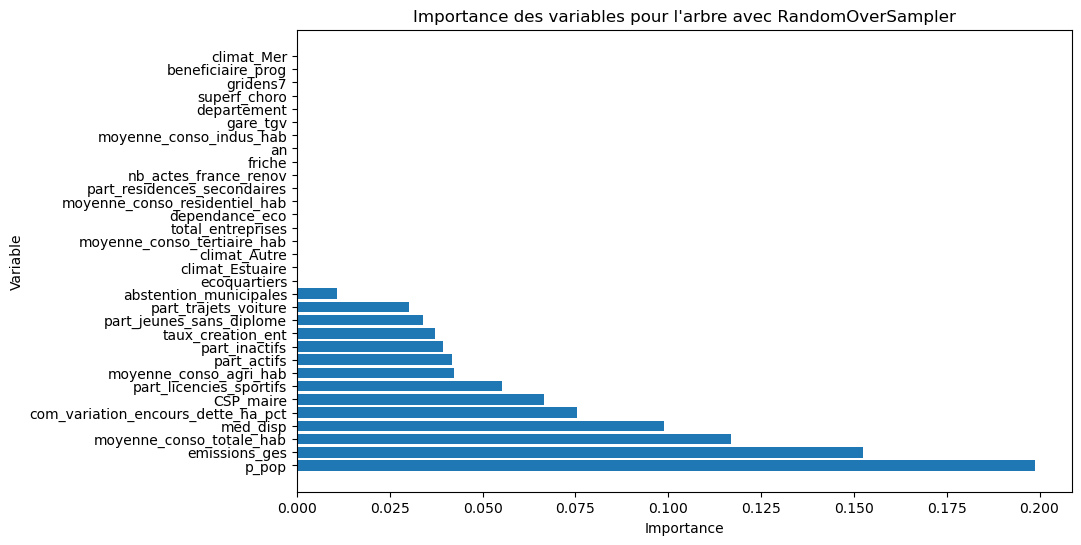

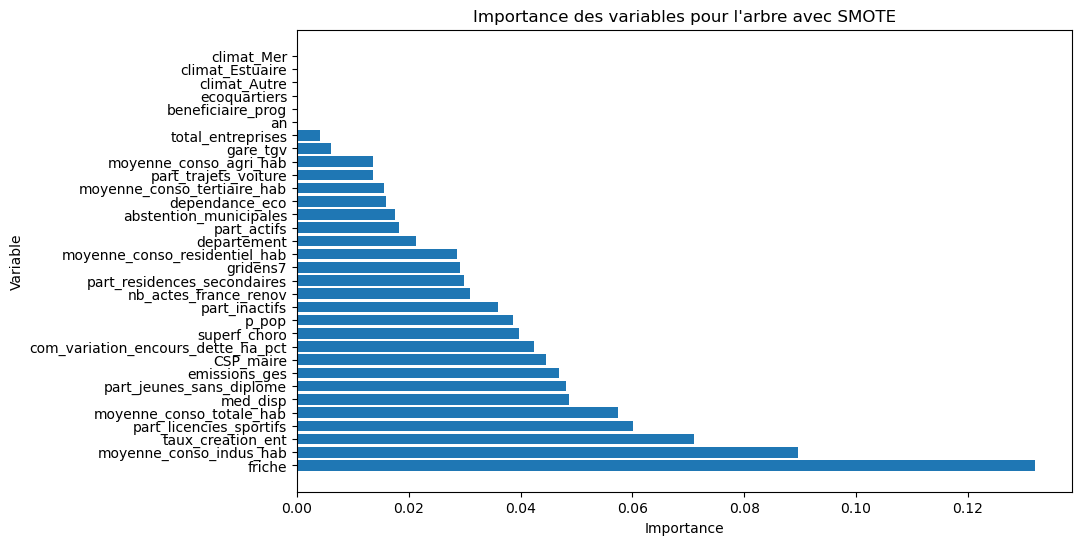

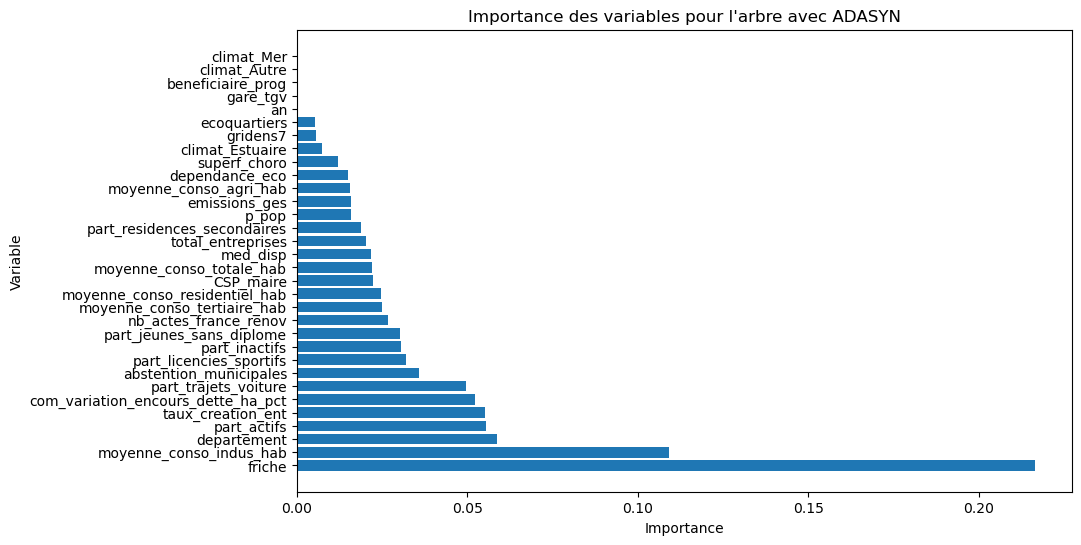

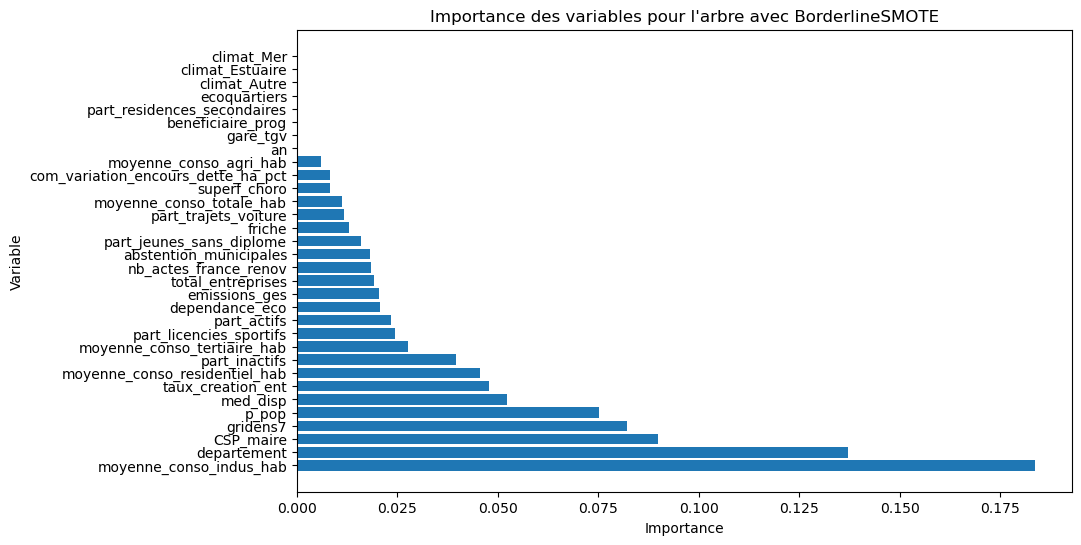

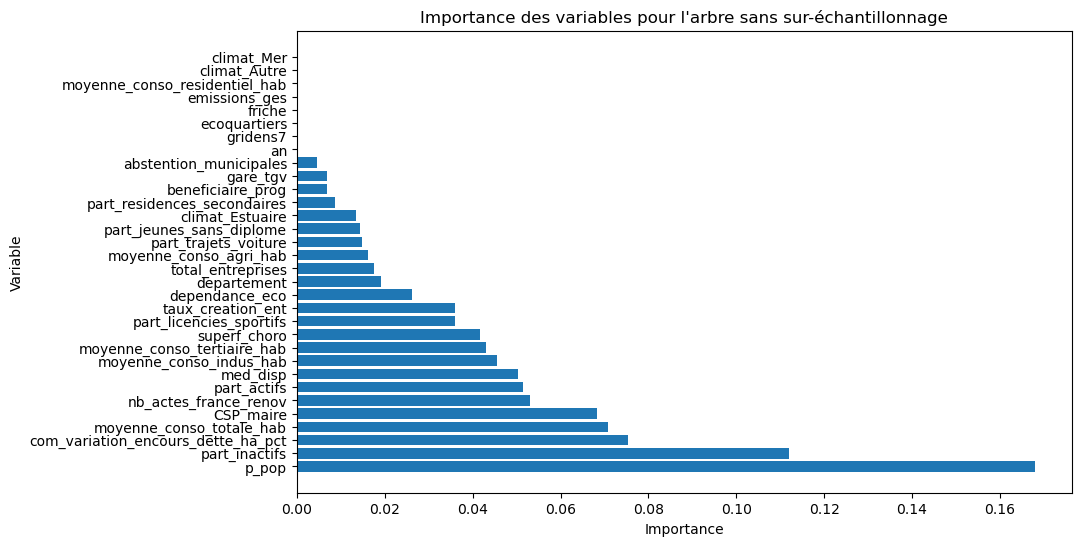

In [1216]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

### F) Ajustement des hyperparamètres bis

In [1217]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, cohen_kappa_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_arbres_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],  # Réduction des profondeurs possibles pour limiter la complexité
    'arbre__min_samples_split': [10, 20, 30],  # Augmentation de min_samples_split pour éviter surapprentissage
    'arbre__min_samples_leaf': [2, 4]  # Augmentation de min_samples_leaf pour éviter surapprentissage
}

param_grid_arbres_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0],
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [3, 6, 9, 15],
    'arbre__min_samples_split': [10, 20, 30],
    'arbre__min_samples_leaf': [2, 4]
}

param_grid_arbres_bis = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], 
    'arbre__max_depth': [3, 6, 9, 15], 
    'arbre__min_samples_split': [10, 20, 30], 
    'arbre__min_samples_leaf': [2, 4] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1218]:
# Ajustement des hyperparamètres
grille_recherche_arbre_oversampler_bis = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_smote_bis = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)
grille_recherche_arbre_adasyn_bis = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_borderline_smote_bis = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_arbre_bis = RandomizedSearchCV(modele_arbre, param_grid_arbres_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)

In [1219]:
modele_arbre_oversampler_opt_bis = grille_recherche_arbre_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_arbre_smote_opt_bis = grille_recherche_arbre_smote_bis.fit(X_train, y_train).best_estimator_
modele_arbre_adasyn_opt_bis = grille_recherche_arbre_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_arbre_borderline_smote_opt_bis = grille_recherche_arbre_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_arbre_opt_bis = grille_recherche_arbre_bis.fit(X_train, y_train).best_estimator_

In [1220]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt_bis.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt_bis.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt_bis.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt_bis.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt_bis.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt_bis.predict(X_test)

### G) Mesure de la performance bis

In [1221]:
# Mesure de la performance

# Calcul des métriques

auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)

# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.638   
F1                                                      0.256   
Balanced Accuracy                                       0.560   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.616   
F1                                        0.274   
Balanced Accuracy                         0.566   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.579   
F1                                                    0.290   
Balanced Accuracy                                     0.575   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.635   
F1                                         0.309   
Balanced Accuracy                          0.594   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.589  
F1                                                  0.298  
Balanced Accuracy                                   0.584

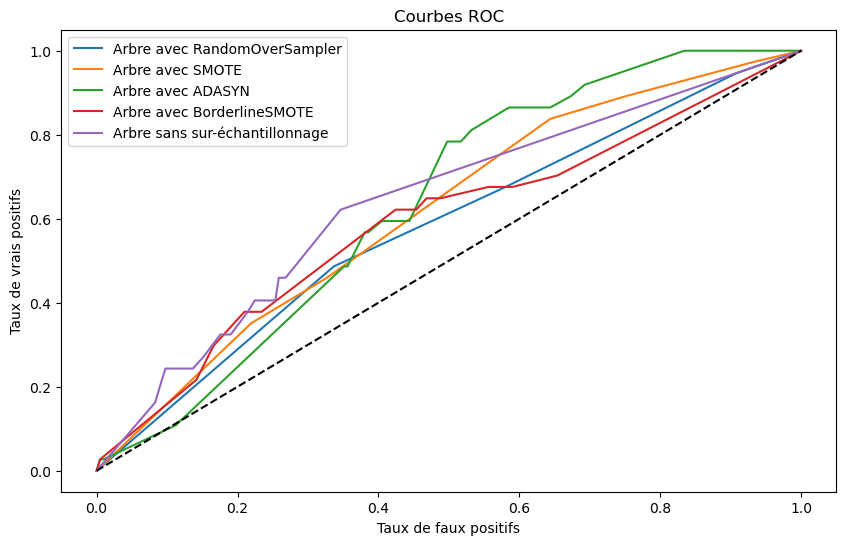

In [1222]:
# Courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [1223]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42))
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier(random_state=42)), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier(random_state=42)) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [1224]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [1225]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [1226]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, f1_rf, balanced_acc_rf],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, f1_rf_smote, balanced_acc_rf_smote],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, f1_rf_oversampler, balanced_acc_rf_oversampler],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, f1_rf_adasyn, balanced_acc_rf_adasyn],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, f1_rf_borderline_smote, balanced_acc_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.583   
AUC-PR                                                  0.215   
F1-score                                                0.000   
Balanced accuracy                                       0.493   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.631   
AUC-PR                                    0.257   
F1-score                                  0.219   
Balanced accuracy                         0.540   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.613   
AUC-PR                                                0.228   
F1-score                                              0.157   
Balanced accuracy                                     0.530   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.617   
AUC-PR                                     0.268   
F1-score                                   0.187   
Balanced accuracy                          0.519   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.592  
AUC-PR                                              0.264  
F1-score                                            0.164  
Balanced accuracy                                   0.508

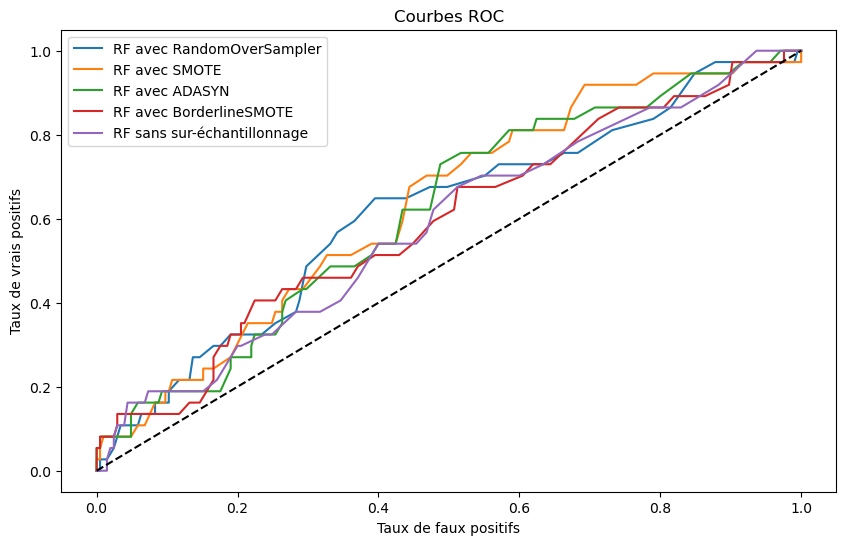

In [1227]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf.png')

plt.show()



### C) Ajustement des hyperparamètres

In [1228]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf = {
    'rf__n_estimators': [100, 300, 500],  
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  
    'rf__max_depth': [3, 15, 21, 27],  
    'rf__min_samples_split': [2, 7, 15, 27],  
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1229]:
# Ajustement des 

grille_recherche_rf_oversampler = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_smote = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_adasyn = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_borderline_smote = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf = RandomizedSearchCV(modele_rf, param_grid_rf, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)

In [1230]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1231]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1232]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1233]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1234]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [1235]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [1236]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler(sampling_strategy=0.5)), ('rf', RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=3,
                       min_samples_split=15, random_state=42))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(sampling_strategy=0.5), 'rf': RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=3,
                       min_samples_split=15, random_state=42), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 0.5, 'oversampler__shrinkage': None, 'rf__bootstrap': False, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'log_loss', 'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__

In [1237]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [1238]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

In [1239]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt


Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.584   
AUC-PR                                                  0.208   
F1-score                                                0.050   
Balanced accuracy                                       0.509   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.621   
AUC-PR                                    0.290   
F1-score                                  0.220   
Balanced accuracy                         0.534   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.619   
AUC-PR                                                0.218   
F1-score                                              0.230   
Balanced accuracy                                     0.553   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.629   
AUC-PR                                     0.253   
F1-score                                   0.313   
Balanced accuracy                          0.598   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.635  
AUC-PR                                              0.259  
F1-score                                            0.279  
Balanced accuracy                                   0.564

In [1240]:
# Export
resultats_rf_opt.to_csv("data/resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Forêts aléatoires sans sur-échantillonnage & Forêts aléatoires avec SMOTE & Forêts aléatoires avec RandomOverSampler & Forêts aléatoires avec ADASYN & Forêts aléatoires avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.584000 & 0.621000 & 0.619000 & 0.629000 & 0.635000 \\
AUC-PR & 0.208000 & 0.290000 & 0.218000 & 0.253000 & 0.259000 \\
F1-score & 0.050000 & 0.220000 & 0.230000 & 0.313000 & 0.279000 \\
Balanced accuracy & 0.509000 & 0.534000 & 0.553000 & 0.598000 & 0.564000 \\
\bottomrule
\end{tabular}



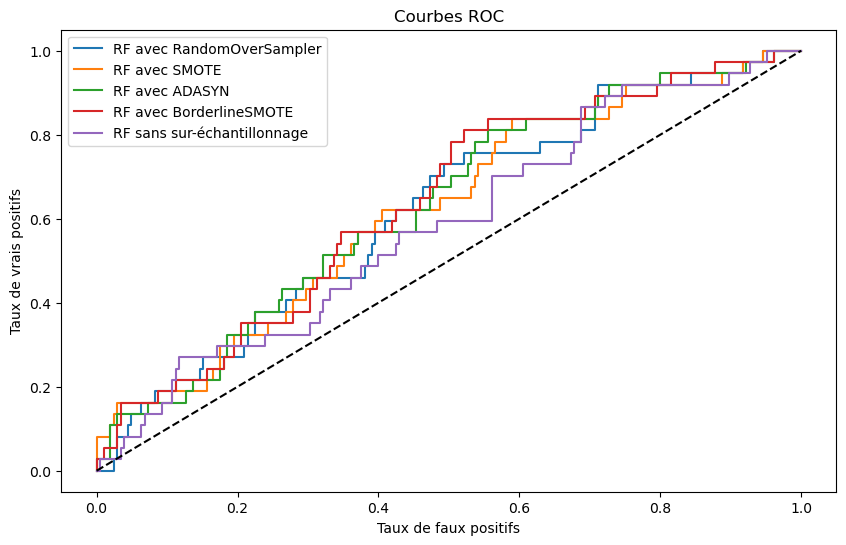

In [1241]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

In [1318]:
# Récupération des paramètres pour le modele avec ADASYN

param_rf = modele_rf_adasyn_opt.get_params()

# Affichage des résultats

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec ADASYN : \n", param_rf)

Les meilleurs paramètres pour le modèle de forêts aléatoires avec ADASYN : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('adasyn', ADASYN(sampling_strategy=1.0)), ('rf', RandomForestClassifier(max_depth=3, min_samples_split=15, n_estimators=300,
                       random_state=42))], 'verbose': False, 'std_scaler': StandardScaler(), 'adasyn': ADASYN(sampling_strategy=1.0), 'rf': RandomForestClassifier(max_depth=3, min_samples_split=15, n_estimators=300,
                       random_state=42), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'adasyn__n_jobs': None, 'adasyn__n_neighbors': 5, 'adasyn__random_state': None, 'adasyn__sampling_strategy': 1.0, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_samples_leaf': 1, 'rf__min_samples_spl

### D bis) Analyse mauvaises perfs

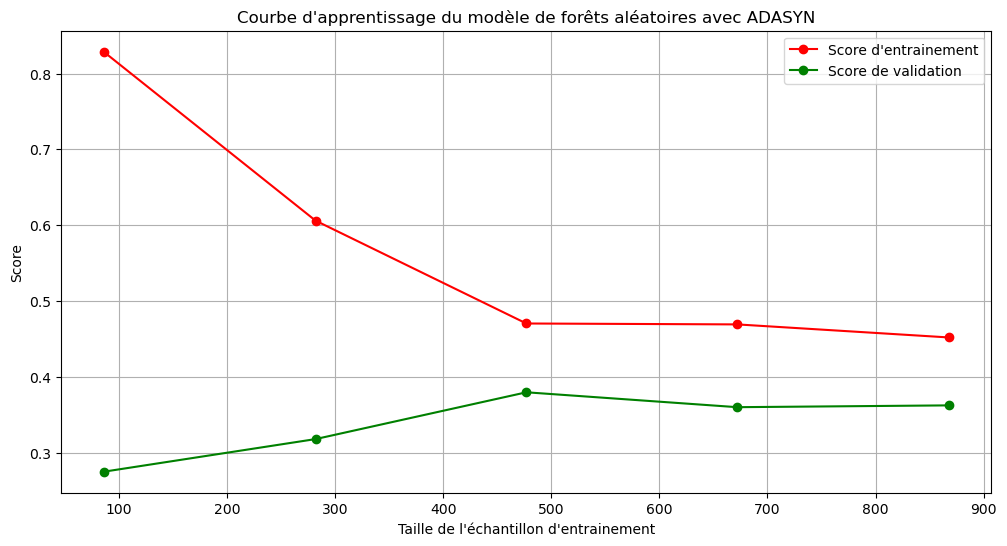

In [1323]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Courbe d'apprentissage simplifiée
train_sizes, train_scores, test_scores = learning_curve(
    modele_rf_adasyn_opt, X_train, y_train, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Score d'entrainement")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Score de validation")
plt.title("Courbe d'apprentissage du modèle de forêts aléatoires avec ADASYN")
plt.xlabel('Taille de l\'échantillon d\'entrainement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Export 
plt.savefig('data/Courbe_apprentissage_rf.png')

plt.show()

### E) Importance des variables

In [1242]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
18                               p_pop    0.132085
22                         part_actifs    0.103505
5                        emissions_ges    0.091624
26                   total_entreprises    0.088217
6                nb_actes_france_renov    0.083011
12                        superf_choro    0.070644
21                       part_inactifs    0.055600
7                               friche    0.039731
16                            med_disp    0.039142
27             part_licencies_sportifs    0.036780
1              moyenne_conso_indus_hab    0.036670
23                      dependance_eco    0.033768
3        moyenne_conso_residentiel_hab    0.029119
25                   taux_creation_ent    0.028630
20  com_variation_encours_dette_ha_pct    0.025156
11                            gridens7    0.017442
2          moyenne_conso_tertiaire_hab    0.017151
24              abstention_municipales    0.016227
0               moyenne_conso_agri_hab    0.009752
4             moyenne_conso_totale_hab    0.009703
28            part_jeunes_sans_diplome    0.009290
19                           CSP_maire    0.008002
15                part_trajets_voiture    0.007372
9          part_residences_secondaires    0.006489
13                         departement    0.002653
14                            gare_tgv    0.002239
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [1243]:
resultats_importance_variables_rf_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.073681
13                         departement    0.065102
11                            gridens7    0.058507
7                               friche    0.058132
18                               p_pop    0.055018
6                nb_actes_france_renov    0.051816
22                         part_actifs    0.046794
26                   total_entreprises    0.045585
21                       part_inactifs    0.043289
23                      dependance_eco    0.039461
5                        emissions_ges    0.038334
19                           CSP_maire    0.038068
12                        superf_choro    0.037860
24              abstention_municipales    0.035514
20  com_variation_encours_dette_ha_pct    0.035441
9          part_residences_secondaires    0.031526
3        moyenne_conso_residentiel_hab    0.030212
27             part_licencies_sportifs    0.028483
16                            med_disp    0.027669
2          moyenne_conso_tertiaire_hab    0.027507
25                   taux_creation_ent    0.026753
0               moyenne_conso_agri_hab    0.026474
4             moyenne_conso_totale_hab    0.025868
28            part_jeunes_sans_diplome    0.023313
15                part_trajets_voiture    0.020680
14                            gare_tgv    0.002735
29                        climat_Autre    0.001933
31                          climat_Mer    0.001815
10                   beneficiaire_prog    0.001126
8                         ecoquartiers    0.000856
30                     climat_Estuaire    0.000445
17                                  an    0.000000

In [1244]:
resultats_importance_variables_rf_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.122396
18                               p_pop    0.092284
7                               friche    0.083144
6                nb_actes_france_renov    0.082437
11                            gridens7    0.076110
13                         departement    0.071145
26                   total_entreprises    0.069423
5                        emissions_ges    0.046926
21                       part_inactifs    0.045149
22                         part_actifs    0.041877
12                        superf_choro    0.041647
28            part_jeunes_sans_diplome    0.033485
24              abstention_municipales    0.024705
19                           CSP_maire    0.024642
23                      dependance_eco    0.023365
27             part_licencies_sportifs    0.022776
20  com_variation_encours_dette_ha_pct    0.017508
16                            med_disp    0.014222
0               moyenne_conso_agri_hab    0.013412
9          part_residences_secondaires    0.012964
2          moyenne_conso_tertiaire_hab    0.011699
4             moyenne_conso_totale_hab    0.007650
15                part_trajets_voiture    0.006460
25                   taux_creation_ent    0.006229
3        moyenne_conso_residentiel_hab    0.006061
30                     climat_Estuaire    0.000692
10                   beneficiaire_prog    0.000551
29                        climat_Autre    0.000551
14                            gare_tgv    0.000194
8                         ecoquartiers    0.000150
31                          climat_Mer    0.000148
17                                  an    0.000000

In [1245]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
18                               p_pop    0.119423
11                            gridens7    0.096257
26                   total_entreprises    0.095774
1              moyenne_conso_indus_hab    0.092459
7                               friche    0.086691
6                nb_actes_france_renov    0.086197
13                         departement    0.067723
5                        emissions_ges    0.059596
22                         part_actifs    0.041824
21                       part_inactifs    0.041636
12                        superf_choro    0.036684
24              abstention_municipales    0.021332
28            part_jeunes_sans_diplome    0.017414
2          moyenne_conso_tertiaire_hab    0.016821
20  com_variation_encours_dette_ha_pct    0.015318
23                      dependance_eco    0.015203
9          part_residences_secondaires    0.012705
16                            med_disp    0.012444
19                           CSP_maire    0.012300
0               moyenne_conso_agri_hab    0.011475
27             part_licencies_sportifs    0.009603
25                   taux_creation_ent    0.009494
3        moyenne_conso_residentiel_hab    0.007392
4             moyenne_conso_totale_hab    0.006432
15                part_trajets_voiture    0.005011
14                            gare_tgv    0.000927
29                        climat_Autre    0.000671
31                          climat_Mer    0.000505
10                   beneficiaire_prog    0.000395
30                     climat_Estuaire    0.000232
8                         ecoquartiers    0.000062
17                                  an    0.000000

In [1246]:
resultats_importance_variables_rf

Variable  Importance
18                               p_pop    0.063154
26                   total_entreprises    0.060631
6                nb_actes_france_renov    0.056744
12                        superf_choro    0.053503
5                        emissions_ges    0.049063
20  com_variation_encours_dette_ha_pct    0.047975
21                       part_inactifs    0.047061
22                         part_actifs    0.045114
2          moyenne_conso_tertiaire_hab    0.044752
4             moyenne_conso_totale_hab    0.043138
27             part_licencies_sportifs    0.042704
1              moyenne_conso_indus_hab    0.041766
16                            med_disp    0.038798
24              abstention_municipales    0.038524
0               moyenne_conso_agri_hab    0.037344
23                      dependance_eco    0.036917
3        moyenne_conso_residentiel_hab    0.036598
28            part_jeunes_sans_diplome    0.036284
9          part_residences_secondaires    0.033500
25                   taux_creation_ent    0.031924
15                part_trajets_voiture    0.031488
19                           CSP_maire    0.023787
7                               friche    0.019717
11                            gridens7    0.013676
13                         departement    0.012591
14                            gare_tgv    0.007600
31                          climat_Mer    0.002132
29                        climat_Autre    0.002047
30                     climat_Estuaire    0.000600
8                         ecoquartiers    0.000473
10                   beneficiaire_prog    0.000398
17                                  an    0.000000

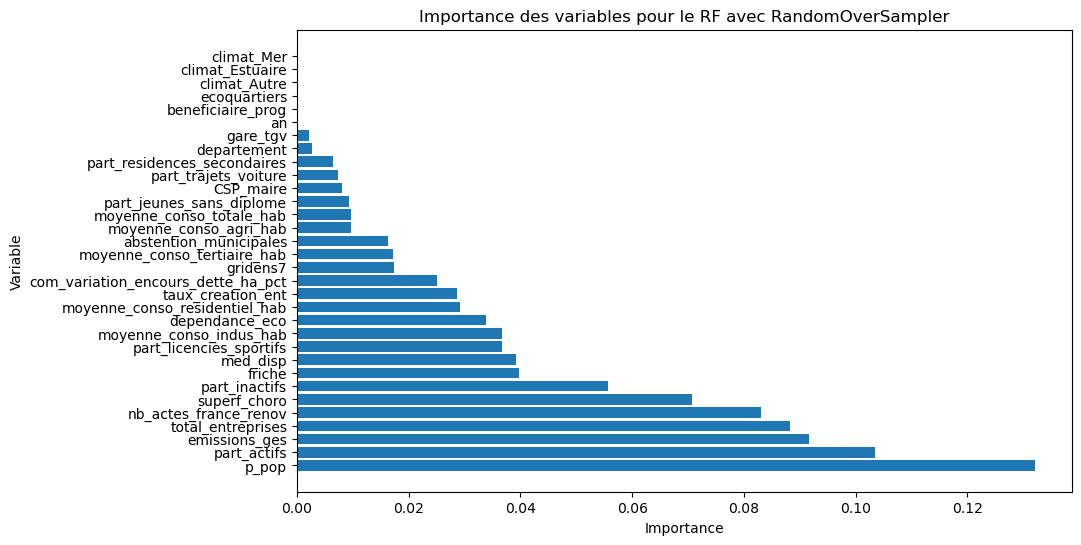

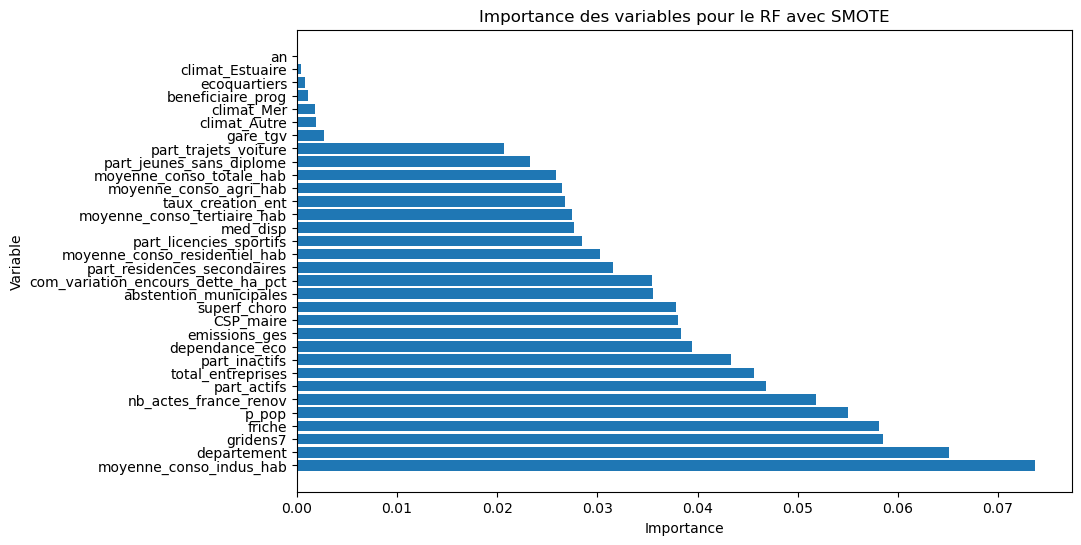

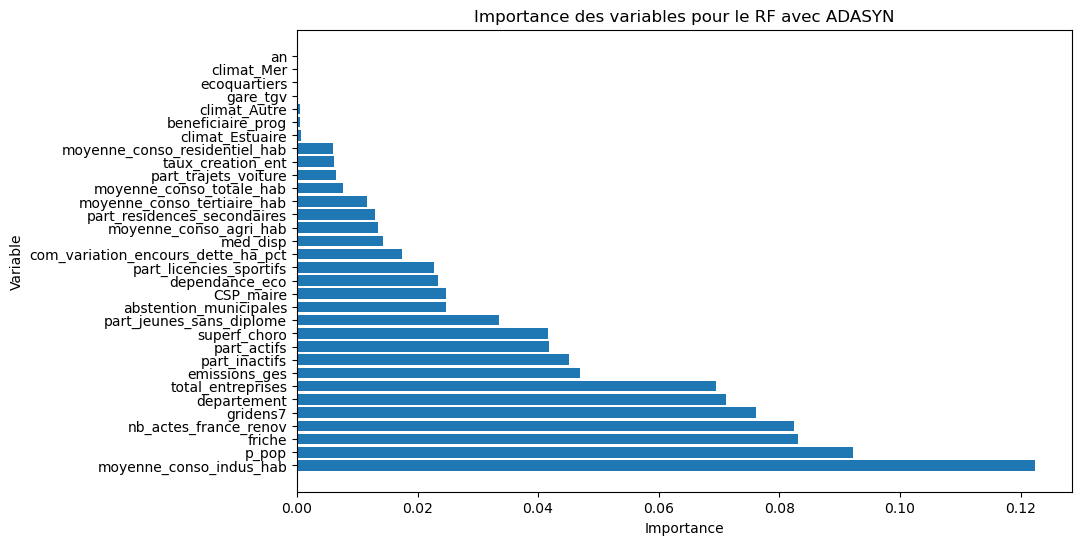

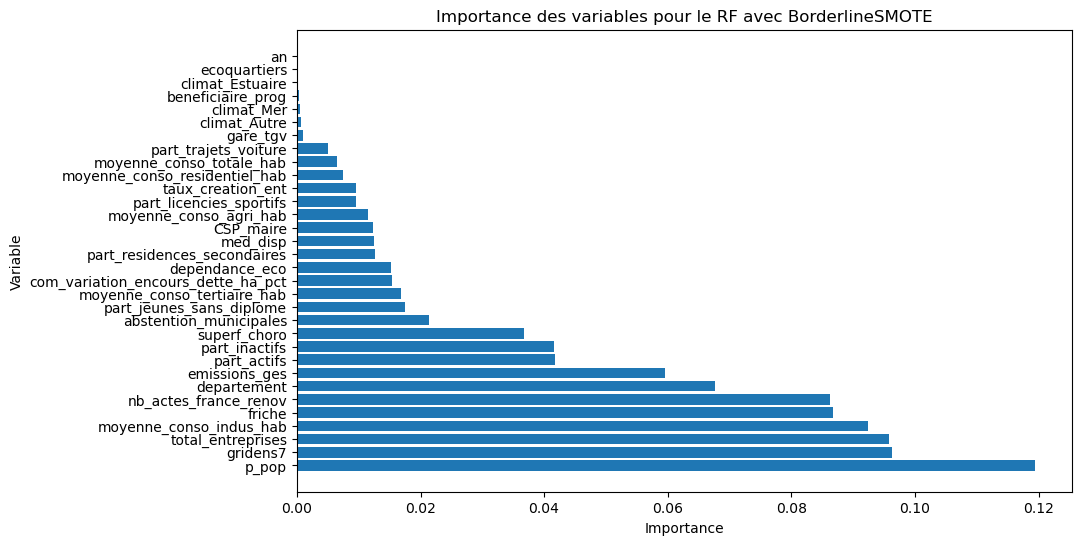

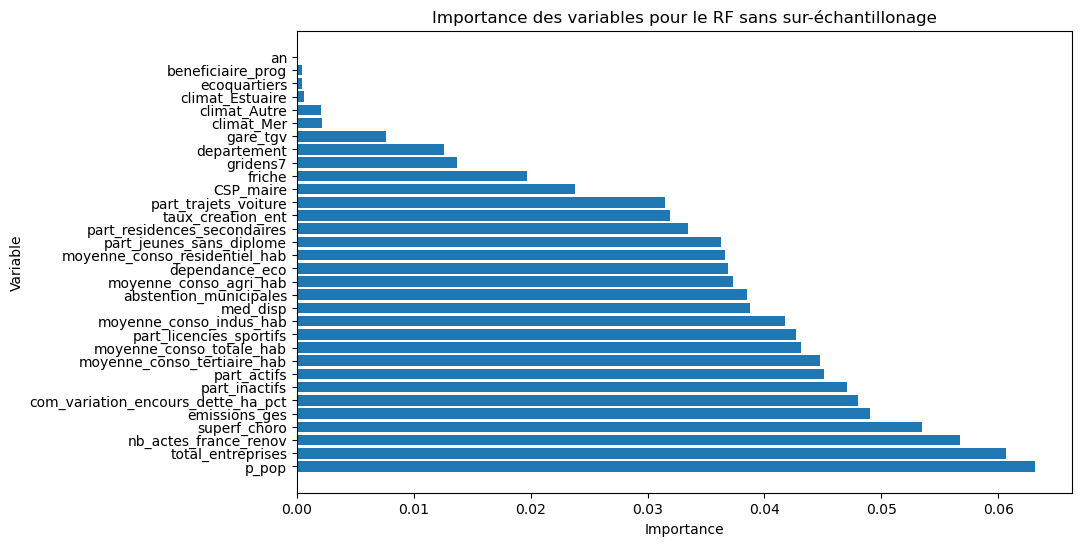

In [1247]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

### F) Ajustement paramètres bis

In [1336]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage
param_grid_rf_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'rf__n_estimators': [50, 100, 300, 500],  # Réduction des options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 6, 15, 21],  # Réduction des options de profondeur maximale
    'rf__min_samples_split': [10, 20],  # Limitation des options pour min_samples_split
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False]  # Limitation à un seul choix de bootstrap
}

param_grid_rf_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [3, 6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [3, 6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

param_grid_rf_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [3, 6, 15, 21],
    'rf__min_samples_split': [10, 20],
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True, False] 
}

param_grid_rf_bis = {
    'rf__n_estimators': [50, 100, 300, 500], 
    'rf__criterion': ['gini', 'entropy', 'log_loss'], 
    'rf__max_depth': [3, 6, 15, 21], 
    'rf__min_samples_split': [10, 20], 
    'rf__min_samples_leaf': [2, 4],
    'rf__bootstrap': [True,False] 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1337]:
grille_recherche_rf_oversampler_bis = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_smote_bis = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_adasyn_bis = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_borderline_smote_bis = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_rf_bis = RandomizedSearchCV(modele_rf, param_grid_rf_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)

In [1338]:
modele_rf_oversampler_opt_bis = grille_recherche_rf_oversampler_bis.fit(X_train, y_train).best_estimator_
modele_rf_smote_opt_bis = grille_recherche_rf_smote_bis.fit(X_train, y_train).best_estimator_
modele_rf_adasyn_opt_bis = grille_recherche_rf_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_rf_borderline_smote_opt_bis = grille_recherche_rf_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_rf_opt_bis = grille_recherche_rf_bis.fit(X_train, y_train).best_estimator_

In [1339]:
# Prédictions

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt_bis.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt_bis.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt_bis.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt_bis.predict(X_test)

y_proba_rf_cv = modele_rf_opt_bis.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt_bis.predict(X_test)

### G) Mesure de la performance bis

In [1340]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)

# Affichage des résultats

resultats_rf_opt_bis = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt_bis = resultats_rf_opt_bis.round(3)
resultats_rf_opt_bis

Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.573   
F1-score                                                0.049   
Balanced accuracy                                       0.506   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.623   
F1-score                                  0.284   
Balanced accuracy                         0.567   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.600   
F1-score                                              0.267   
Balanced accuracy                                     0.553   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.634   
F1-score                                   0.284   
Balanced accuracy                          0.567   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.642  
F1-score                                            0.302  
Balanced accuracy                                   0.586

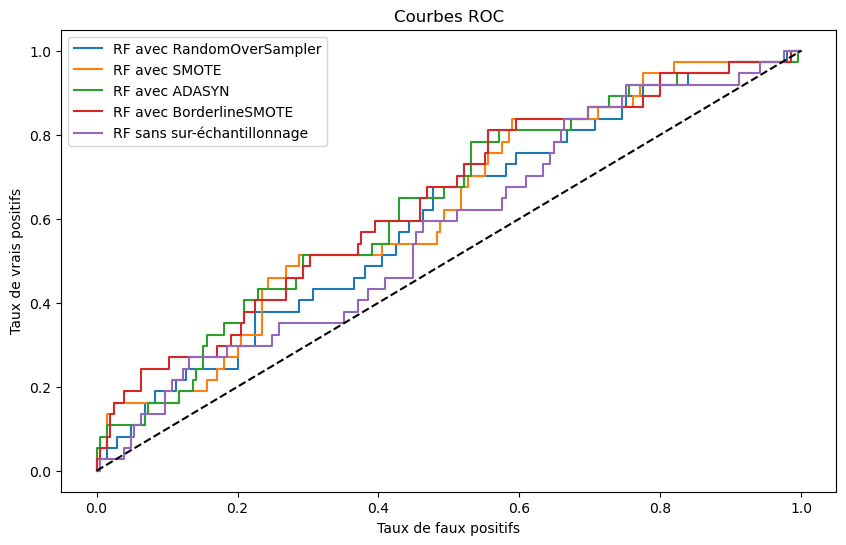

In [1341]:
# Courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

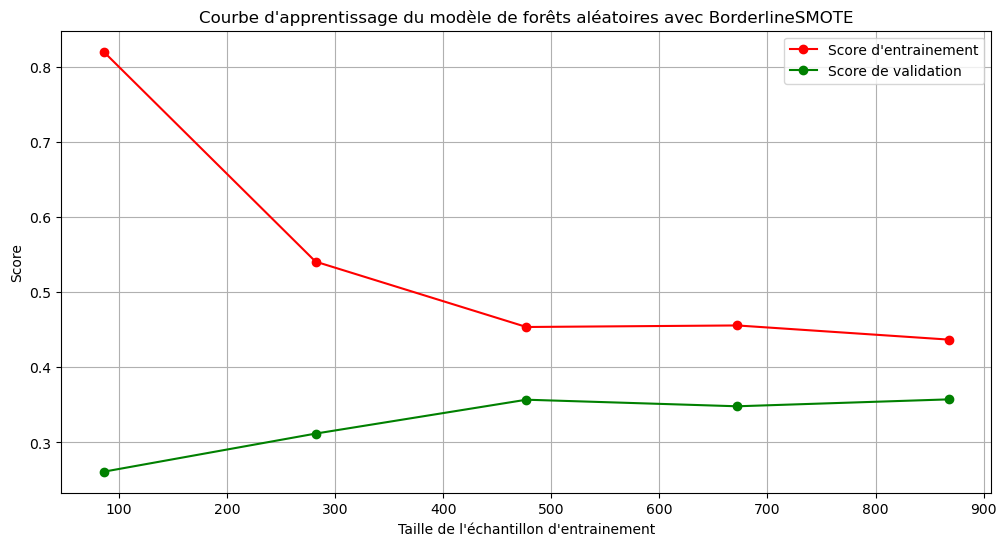

In [1345]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Courbe d'apprentissage simplifiée
train_sizes, train_scores, test_scores = learning_curve(
    modele_rf_borderline_smote_opt_bis, X_train, y_train, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Score d'entrainement")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Score de validation")
plt.title("Courbe d'apprentissage du modèle de forêts aléatoires avec BorderlineSMOTE")
plt.xlabel('Taille de l\'échantillon d\'entrainement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Export 
plt.savefig('data/Courbe_apprentissage_rf_bis.png')

plt.show()

In [1343]:
# Récupération des paramètres pour le modele avec ADASYN

param_rf_bis = modele_rf_borderline_smote_opt_bis.get_params()

# Affichage des résultats

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec BorderlineSMOTE : \n", param_rf_bis)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec BorderlineSMOTE : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('borderline_smote', BorderlineSMOTE(sampling_strategy=1.0)), ('rf', RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=3,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=500, random_state=42))], 'verbose': False, 'std_scaler': StandardScaler(), 'borderline_smote': BorderlineSMOTE(sampling_strategy=1.0), 'rf': RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=3,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=500, random_state=42), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'borderline_smote__k_neighbors': 5, 'borderline_smote__kind': 'borderline-1', 'borderline_smote__m_neighbors': 10, 'borderline_smote__n_jobs': None, 'borderline_smote__random_state'

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [1254]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier(random_state=42)) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [1255]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [1256]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [1257]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [1258]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, f1_gb, balanced_acc_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, f1_gb_smote, balanced_acc_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, f1_gb_randomoversampler, balanced_acc_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, f1_gb_adasyn, balanced_acc_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, f1_gb_borderline_smote, balanced_acc_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.627   
AUC-PR                                                  0.244   
F1-score                                                0.133   
Balanced accuracy                                       0.528   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.632   
AUC-PR                                    0.245   
F1-score                                  0.247   
Balanced accuracy                         0.549   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.636   
AUC-PR                                                0.244   
F1-score                                              0.159   
Balanced accuracy                                     0.516   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.628   
AUC-PR                                     0.241   
F1-score                                   0.293   
Balanced accuracy                          0.582   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.636  
AUC-PR                                              0.218  
F1-score                                            0.214  
Balanced accuracy                                   0.529

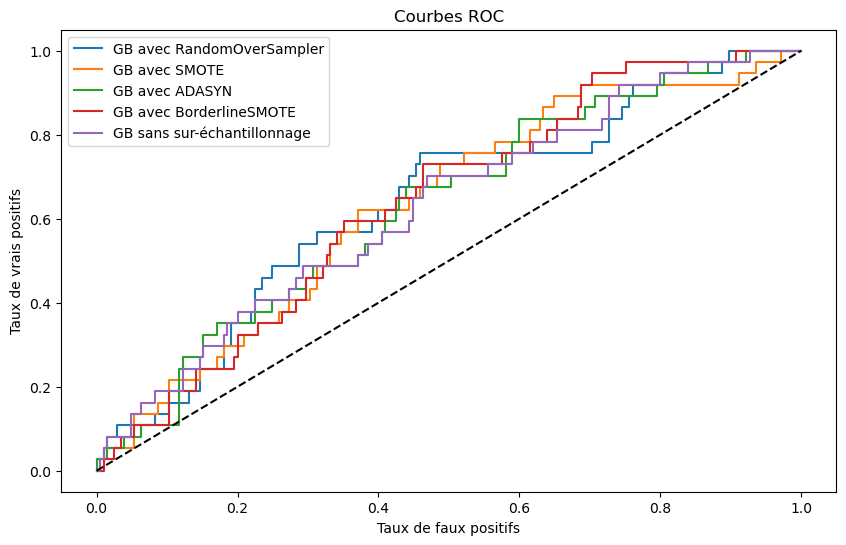

In [1259]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image
plt.savefig('data/Courbes_ROC_gb.png')

plt.show()


### C) Ajustement des hyperparamètres

In [1260]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_smote = {
    'smote__k_neighbors': [3, 5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
     'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

param_grid_gb = {
    'gb__n_estimators': [100, 200, 300, 400, 500],  
    'gb__learning_rate': [0.05, 0.1, 0.5],  
    'gb__max_depth': [3, 5, 7, 9]  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1261]:
# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_gb_smote = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb_adasyn = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb_borderline_smote = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb = RandomizedSearchCV(modele_gb, param_grid_gb, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)

In [1262]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1263]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1264]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1265]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1266]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

In [1267]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [1268]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [1269]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.597   
AUC-PR                                                  0.269   
F1-score                                                0.179   
Balanced accuracy                                       0.533   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.635   
AUC-PR                                    0.249   
F1-score                                  0.238   
Balanced accuracy                         0.545   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.620   
AUC-PR                                                0.227   
F1-score                                              0.263   
Balanced accuracy                                     0.556   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.622   
AUC-PR                                     0.240   
F1-score                                   0.206   
Balanced accuracy                          0.536   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.643  
AUC-PR                                              0.253  
F1-score                                            0.273  
Balanced accuracy                                   0.573

In [1270]:
# Export
resultats_gb_cv.to_csv("data/resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.597000 & 0.635000 & 0.620000 & 0.622000 & 0.643000 \\
AUC-PR & 0.269000 & 0.249000 & 0.227000 & 0.240000 & 0.253000 \\
F1-score & 0.179000 & 0.238000 & 0.263000 & 0.206000 & 0.273000 \\
Balanced accuracy & 0.533000 & 0.545000 & 0.556000 & 0.536000 & 0.573000 \\
\bottomrule
\end{tabular}



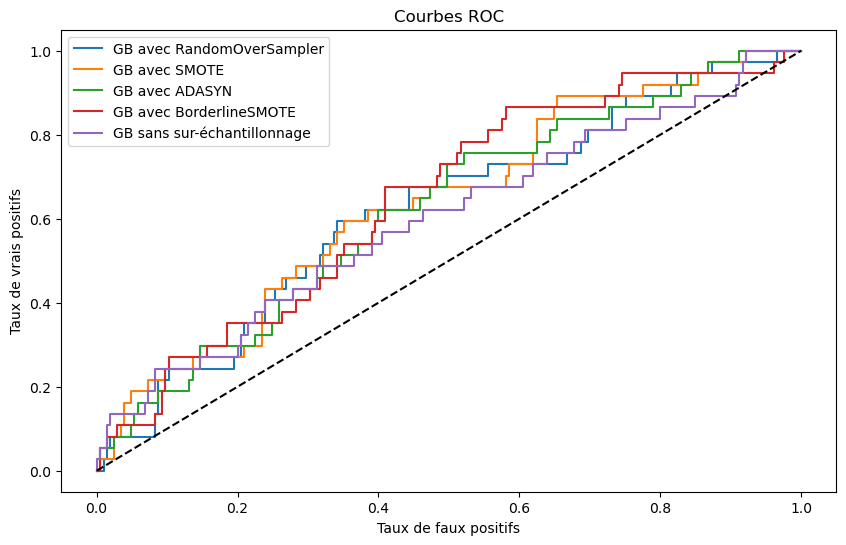

In [1271]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()


### E) Importance des variables

In [1272]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable  Importance
26                   total_entreprises    0.098152
20  com_variation_encours_dette_ha_pct    0.073525
21                       part_inactifs    0.069347
12                        superf_choro    0.058677
24              abstention_municipales    0.054682
22                         part_actifs    0.051639
18                               p_pop    0.050500
0               moyenne_conso_agri_hab    0.050354
27             part_licencies_sportifs    0.050209
6                nb_actes_france_renov    0.042650
19                           CSP_maire    0.042388
1              moyenne_conso_indus_hab    0.041135
4             moyenne_conso_totale_hab    0.036612
28            part_jeunes_sans_diplome    0.035581
2          moyenne_conso_tertiaire_hab    0.035230
25                   taux_creation_ent    0.034789
16                            med_disp    0.030844
23                      dependance_eco    0.024638
3        moyenne_conso_residentiel_hab    0.021831
9          part_residences_secondaires    0.019924
15                part_trajets_voiture    0.019849
5                        emissions_ges    0.016437
7                               friche    0.014721
13                         departement    0.013201
11                            gridens7    0.006407
14                            gare_tgv    0.003128
10                   beneficiaire_prog    0.002211
31                          climat_Mer    0.001089
30                     climat_Estuaire    0.000250
17                                  an    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000

In [1273]:
resultats_importance_variables_gb_smote

Variable  Importance
13                         departement    0.166946
7                               friche    0.146119
1              moyenne_conso_indus_hab    0.087490
11                            gridens7    0.074241
21                       part_inactifs    0.045455
20  com_variation_encours_dette_ha_pct    0.039393
19                           CSP_maire    0.037210
12                        superf_choro    0.033032
6                nb_actes_france_renov    0.031556
24              abstention_municipales    0.029445
26                   total_entreprises    0.029151
9          part_residences_secondaires    0.027785
27             part_licencies_sportifs    0.027216
22                         part_actifs    0.026892
23                      dependance_eco    0.023678
4             moyenne_conso_totale_hab    0.021158
25                   taux_creation_ent    0.019207
18                               p_pop    0.018736
3        moyenne_conso_residentiel_hab    0.018301
2          moyenne_conso_tertiaire_hab    0.018047
5                        emissions_ges    0.017758
15                part_trajets_voiture    0.017072
0               moyenne_conso_agri_hab    0.014390
16                            med_disp    0.013712
28            part_jeunes_sans_diplome    0.010027
14                            gare_tgv    0.001995
10                   beneficiaire_prog    0.001991
30                     climat_Estuaire    0.001080
8                         ecoquartiers    0.000918
17                                  an    0.000000
29                        climat_Autre    0.000000
31                          climat_Mer    0.000000

In [1274]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.194647
13                         departement    0.089876
1              moyenne_conso_indus_hab    0.087855
21                       part_inactifs    0.060032
6                nb_actes_france_renov    0.042489
12                        superf_choro    0.042291
27             part_licencies_sportifs    0.034139
20  com_variation_encours_dette_ha_pct    0.033039
11                            gridens7    0.031174
24              abstention_municipales    0.030865
18                               p_pop    0.030839
19                           CSP_maire    0.030044
3        moyenne_conso_residentiel_hab    0.029505
2          moyenne_conso_tertiaire_hab    0.029134
25                   taux_creation_ent    0.027171
22                         part_actifs    0.027097
16                            med_disp    0.026419
28            part_jeunes_sans_diplome    0.024490
15                part_trajets_voiture    0.023704
4             moyenne_conso_totale_hab    0.022725
23                      dependance_eco    0.021256
5                        emissions_ges    0.019741
9          part_residences_secondaires    0.013532
26                   total_entreprises    0.012755
0               moyenne_conso_agri_hab    0.007167
14                            gare_tgv    0.002629
30                     climat_Estuaire    0.002183
10                   beneficiaire_prog    0.002005
8                         ecoquartiers    0.000650
31                          climat_Mer    0.000338
29                        climat_Autre    0.000211
17                                  an    0.000000

In [1275]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.194647
13                         departement    0.089876
1              moyenne_conso_indus_hab    0.087855
21                       part_inactifs    0.060032
6                nb_actes_france_renov    0.042489
12                        superf_choro    0.042291
27             part_licencies_sportifs    0.034139
20  com_variation_encours_dette_ha_pct    0.033039
11                            gridens7    0.031174
24              abstention_municipales    0.030865
18                               p_pop    0.030839
19                           CSP_maire    0.030044
3        moyenne_conso_residentiel_hab    0.029505
2          moyenne_conso_tertiaire_hab    0.029134
25                   taux_creation_ent    0.027171
22                         part_actifs    0.027097
16                            med_disp    0.026419
28            part_jeunes_sans_diplome    0.024490
15                part_trajets_voiture    0.023704
4             moyenne_conso_totale_hab    0.022725
23                      dependance_eco    0.021256
5                        emissions_ges    0.019741
9          part_residences_secondaires    0.013532
26                   total_entreprises    0.012755
0               moyenne_conso_agri_hab    0.007167
14                            gare_tgv    0.002629
30                     climat_Estuaire    0.002183
10                   beneficiaire_prog    0.002005
8                         ecoquartiers    0.000650
31                          climat_Mer    0.000338
29                        climat_Autre    0.000211
17                                  an    0.000000

In [1276]:
resultats_importance_variables_gb

Variable  Importance
0               moyenne_conso_agri_hab    0.025056
1              moyenne_conso_indus_hab    0.037171
2          moyenne_conso_tertiaire_hab    0.060806
3        moyenne_conso_residentiel_hab    0.030976
4             moyenne_conso_totale_hab    0.048533
5                        emissions_ges    0.036751
6                nb_actes_france_renov    0.042161
7                               friche    0.005693
8                         ecoquartiers    0.000044
9          part_residences_secondaires    0.006751
10                   beneficiaire_prog    0.002999
11                            gridens7    0.014578
12                        superf_choro    0.065501
13                         departement    0.012125
14                            gare_tgv    0.004865
15                part_trajets_voiture    0.029936
16                            med_disp    0.034080
17                                  an    0.000000
18                               p_pop    0.093571
19                           CSP_maire    0.020829
20  com_variation_encours_dette_ha_pct    0.067226
21                       part_inactifs    0.089817
22                         part_actifs    0.049076
23                      dependance_eco    0.027156
24              abstention_municipales    0.033450
25                   taux_creation_ent    0.038045
26                   total_entreprises    0.025808
27             part_licencies_sportifs    0.052828
28            part_jeunes_sans_diplome    0.038581
29                        climat_Autre    0.000011
30                     climat_Estuaire    0.005340
31                          climat_Mer    0.000235

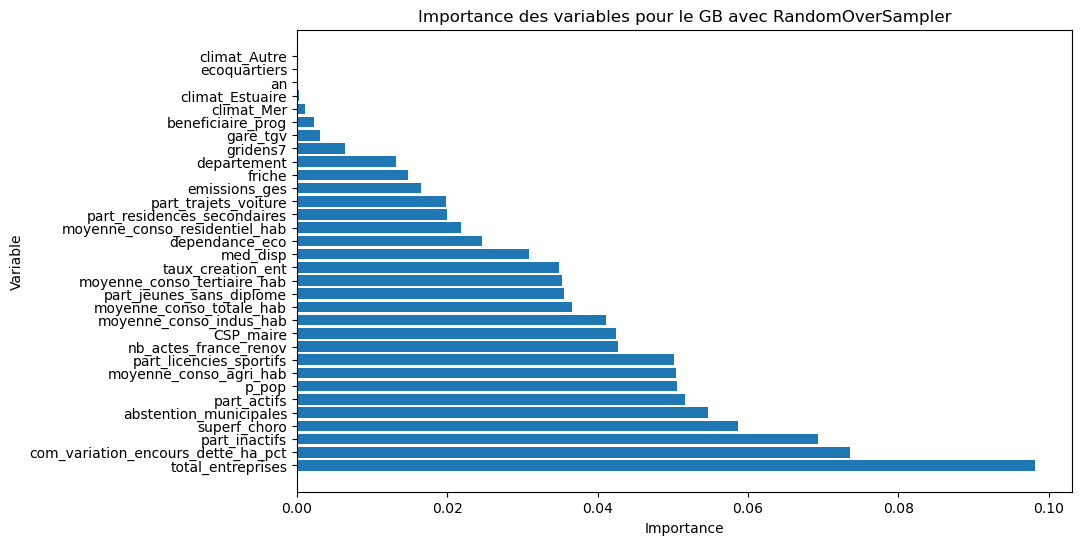

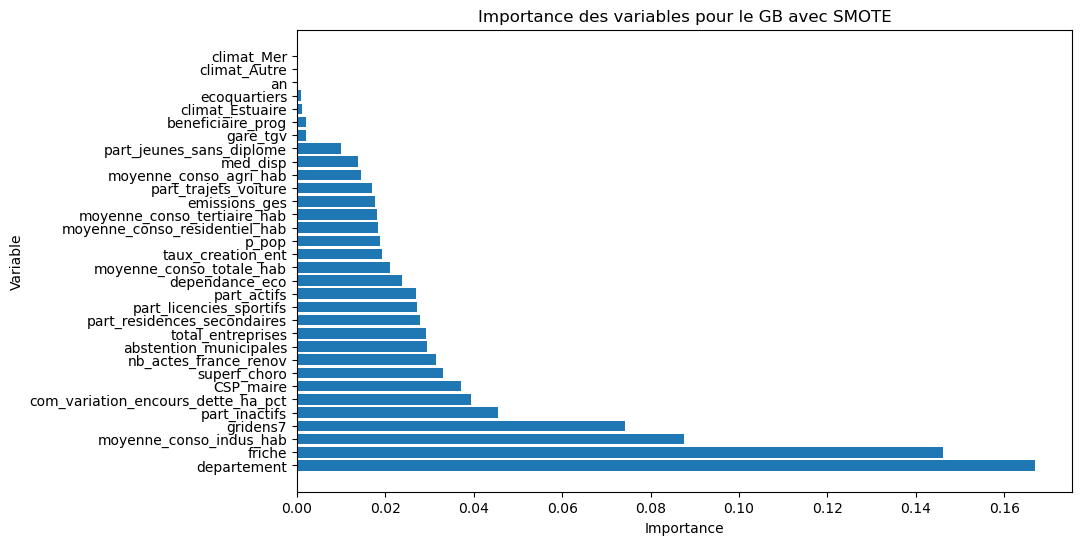

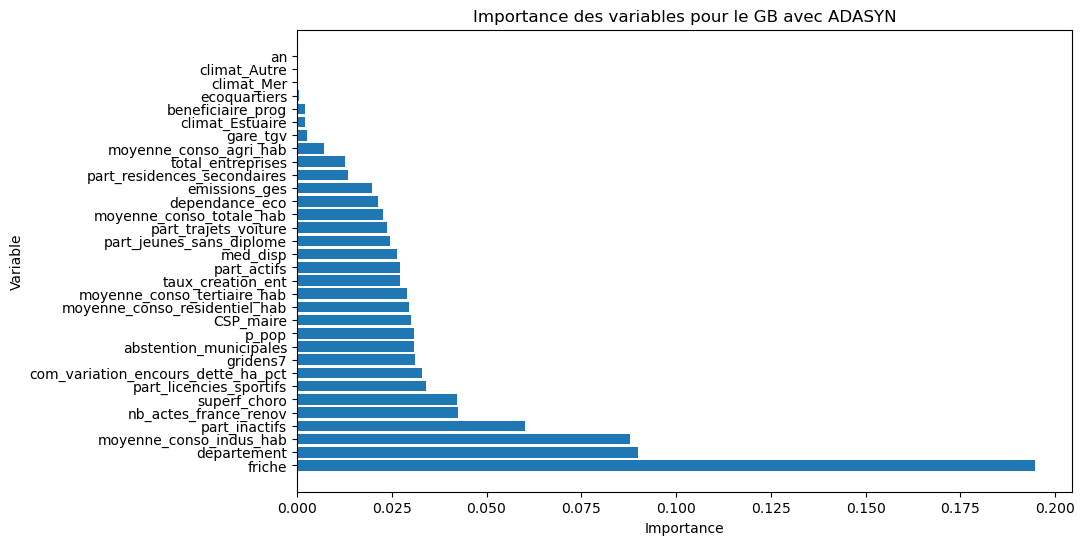

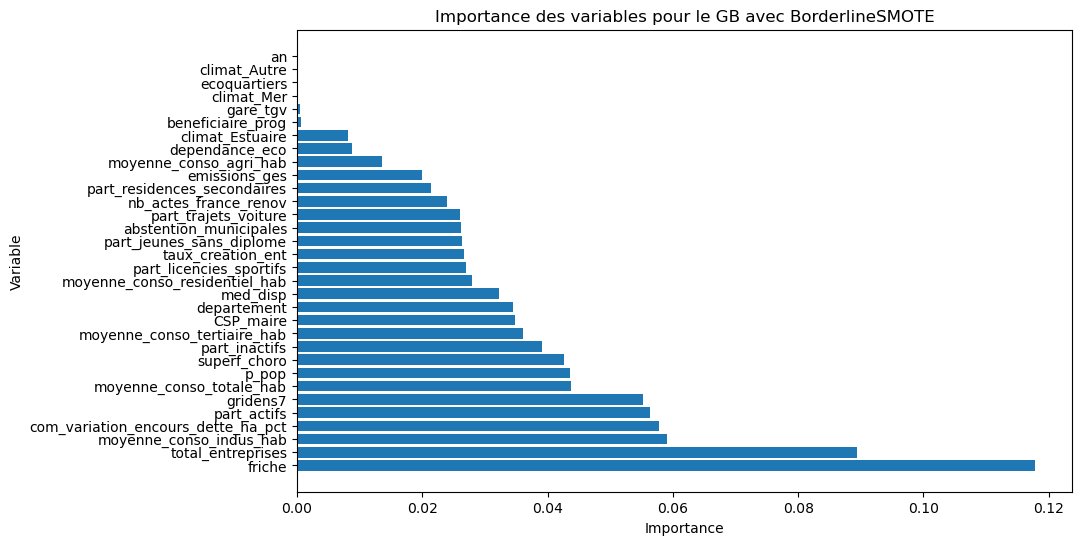

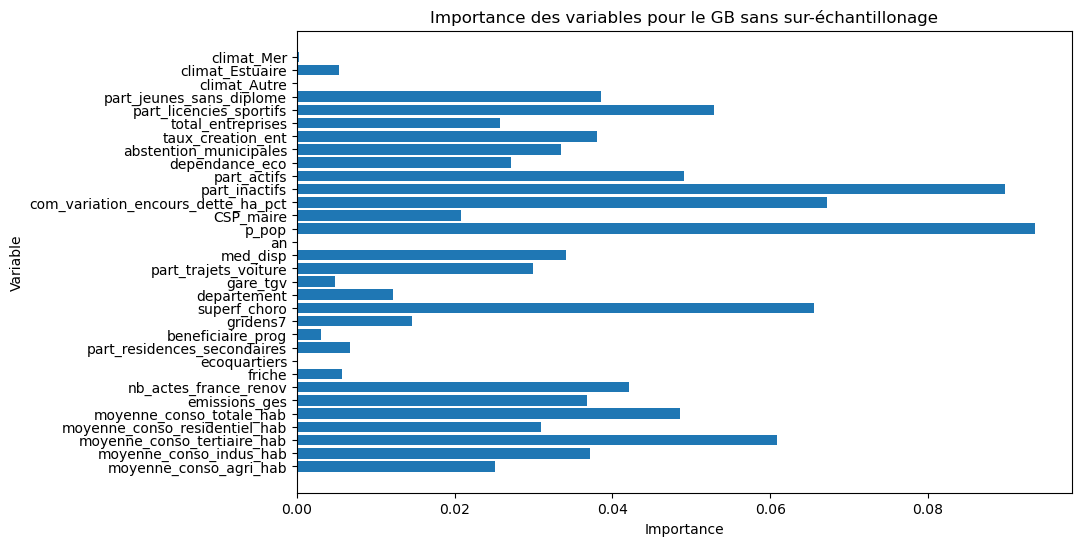

In [1277]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

### F) Ajustement des hyperparamètres bis

In [1278]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_gb_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'gb__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'gb__learning_rate': [0.01, 0.1, 0.5],  # Ajout d'une valeur plus basse pour learning_rate
    'gb__max_depth': [3, 5, 7]  # Limitation des options pour max_depth
}

param_grid_gb_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

param_grid_gb_bis = {
    'gb__n_estimators': [50, 100, 300], 
    'gb__learning_rate': [0.01, 0.1, 0.5], 
    'gb__max_depth': [3, 5, 7]  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1279]:
grille_recherche_gb_randomoversampler_bis = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_gb_smote_bis = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb_adasyn_bis = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb_borderline_smote_bis = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_gb_bis = RandomizedSearchCV(modele_gb, param_grid_gb_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)

In [1280]:
modele_gb_oversampler_opt_bis = grille_recherche_gb_randomoversampler_bis.fit(X_train, y_train).best_estimator_
modele_gb_smote_opt_bis = grille_recherche_gb_smote_bis.fit(X_train, y_train).best_estimator_
modele_gb_adasyn_opt_bis = grille_recherche_gb_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_gb_borderline_smote_opt_bis = grille_recherche_gb_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_gb_opt_bis = grille_recherche_gb_bis.fit(X_train, y_train).best_estimator_   

In [1281]:
# Prédictions avec les meilleurs hyperparamètres

y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt_bis.predict(X_test)
y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_smote_cv = modele_gb_smote_opt_bis.predict(X_test)
y_proba_gb_smote_cv = modele_gb_smote_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_adasyn_cv = modele_gb_adasyn_opt_bis.predict(X_test)
y_proba_gb_adasyn_cv = modele_gb_adasyn_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt_bis.predict(X_test)
y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]

y_pred_gb_cv = modele_gb_opt_bis.predict(X_test)
y_proba_gb_cv = modele_gb_opt_bis.predict_proba(X_test)[:, 1]

### G) Mesure de la performance bis

In [1282]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)

# Affichage des résultats
resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.621   
F1-score                                                0.172   
Balanced accuracy                                       0.529   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.658   
F1-score                                  0.260   
Balanced accuracy                         0.554   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.622   
F1-score                                              0.264   
Balanced accuracy                                     0.560   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.654   
F1-score                                   0.339   
Balanced accuracy                          0.620   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.619  
F1-score                                            0.254  
Balanced accuracy                                   0.542

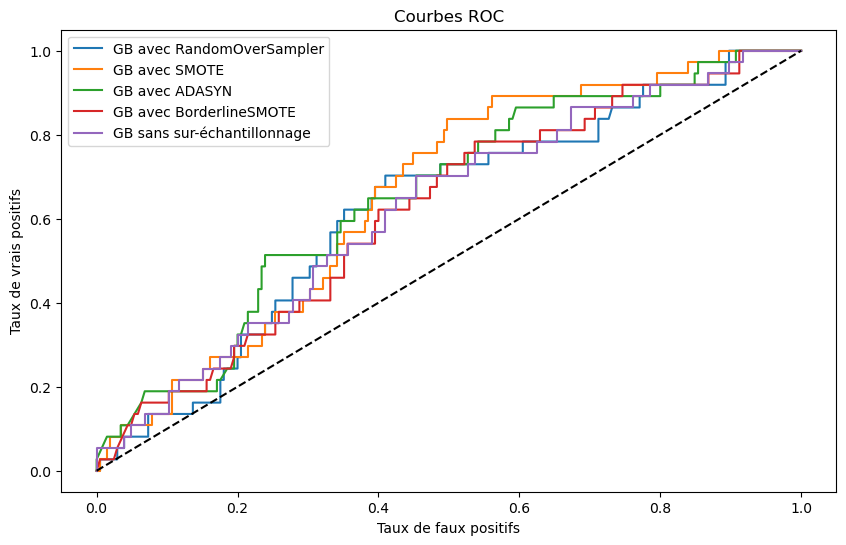

In [1283]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [1284]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier(random_state=42)) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [1285]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier(random_state=42))])

In [1286]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

In [1287]:
print(f'y_test shape: {y_test.shape}')
print(f'y_proba_adaboost_randomoversampler shape: {y_proba_adaboost_randomoversampler.shape}')
print(f'y_proba_adaboost_smote shape: {y_proba_adaboost_smote.shape}')
print(f'y_proba_adaboost_adasyn shape: {y_proba_adaboost_adasyn.shape}')
print(f'y_proba_adaboost_borderline_smote shape: {y_proba_adaboost_borderline_smote.shape}')
print(f'y_proba_adaboost shape: {y_proba_adaboost.shape}')


y_test shape: (242,)
y_proba_adaboost_randomoversampler shape: (242,)
y_proba_adaboost_smote shape: (242,)
y_proba_adaboost_adasyn shape: (242,)
y_proba_adaboost_borderline_smote shape: (242,)
y_proba_adaboost shape: (242,)


### B) Mesure de la performance des modèles initiaux

In [1288]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [1289]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, f1_adaboost, balanced_acc_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, f1_adaboost_smote, balanced_acc_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, f1_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, f1_adaboost_adasyn, balanced_acc_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, f1_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.628                0.607   
AUC-PR                                         0.270                0.218   
F1-score                                       0.197                0.274   
Balanced accuracy                              0.537                0.566   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.653                 0.628   
AUC-PR                                       0.304                 0.243   
F1-score                                     0.331                 0.297   
Balanced accuracy                            0.614                 0.583   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.608  
AUC-PR                                     0.205  
F1-score                                   0.272  
Balanced accuracy                          0.562

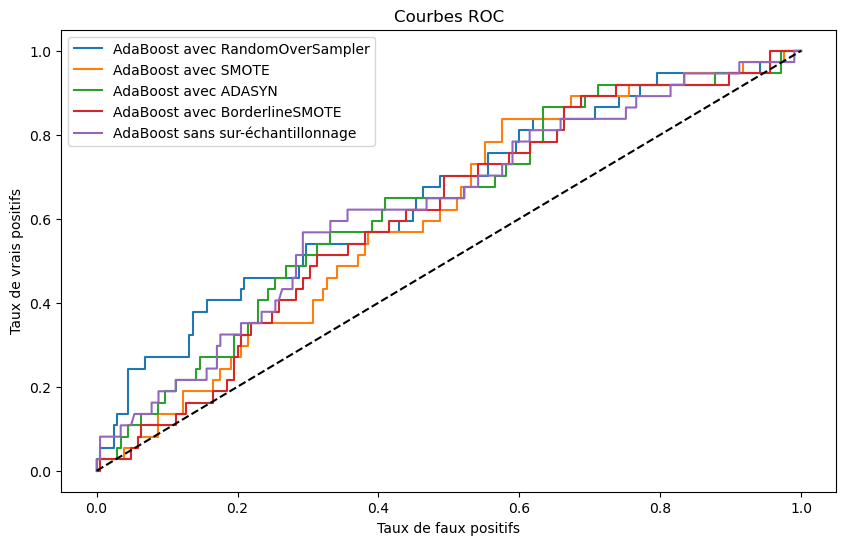

In [1290]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost.png')

plt.show()


### C) Ajustement des hyperparamètres

In [1291]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0],  
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [3, 5, 7],  
    'smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7], 
    'adasyn__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7], 
    'borderline_smote__sampling_strategy': [0.2, 0.4, 0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500],  
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], 
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1292]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=cv, scoring=scoring, refit='F1', n_jobs=-1,  random_state=42)
grille_recherche_adaboost_smote = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_adaboost_adasyn = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_adaboost_borderline_smote = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=cv, scoring=scoring, refit='F1',n_jobs=-1, random_state=42)
grille_recherche_adaboost = RandomizedSearchCV(modele_adaboost, param_grid_adaboost, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,random_state=42)

In [1293]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1294]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1295]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1296]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X,

In [1297]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

In [1298]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [1299]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

In [1300]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.617                0.648   
AUC-PR                                         0.269                0.240   
F1-score                                       0.143                0.280   
Balanced accuracy                              0.517                0.569   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.615                 0.645   
AUC-PR                                       0.192                 0.246   
F1-score                                     0.279                 0.298   
Balanced accuracy                            0.563                 0.583   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.627  
AUC-PR                                     0.240  
F1-score                                   0.259  
Balanced accuracy                          0.550

In [1301]:
# Export 
resultats_adaboost_cv.to_csv("data/resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.617000 & 0.648000 & 0.615000 & 0.645000 & 0.627000 \\
AUC-PR & 0.269000 & 0.240000 & 0.192000 & 0.246000 & 0.240000 \\
F1-score & 0.143000 & 0.280000 & 0.279000 & 0.298000 & 0.259000 \\
Balanced accuracy & 0.517000 & 0.569000 & 0.563000 & 0.583000 & 0.550000 \\
\bottomrule
\end{tabular}



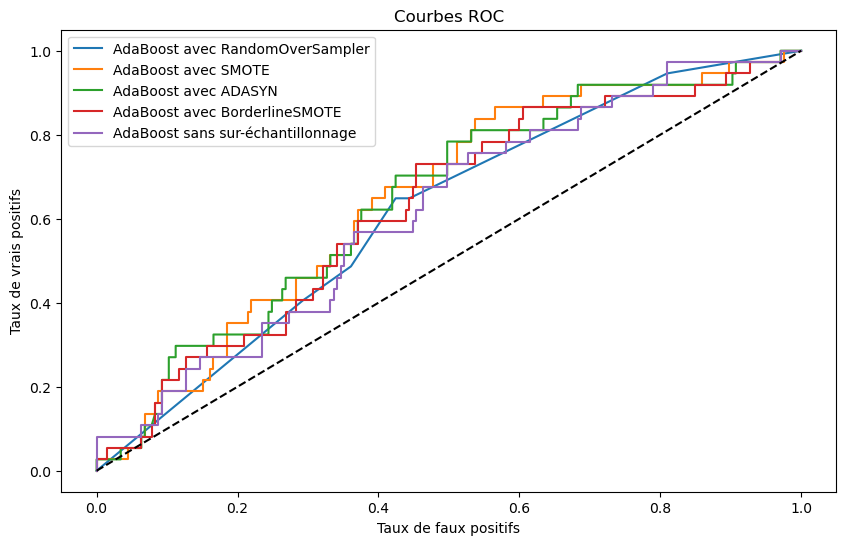

In [1302]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

### E) Importance des variables

In [1303]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
18                               p_pop        0.46
26                   total_entreprises        0.40
22                         part_actifs        0.14
0               moyenne_conso_agri_hab        0.00
1              moyenne_conso_indus_hab        0.00
30                     climat_Estuaire        0.00
29                        climat_Autre        0.00
28            part_jeunes_sans_diplome        0.00
27             part_licencies_sportifs        0.00
25                   taux_creation_ent        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
21                       part_inactifs        0.00
20  com_variation_encours_dette_ha_pct        0.00
19                           CSP_maire        0.00
17                                  an        0.00
16                            med_disp        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
12                        superf_choro        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
6                nb_actes_france_renov        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [1304]:
resultats_importance_variables_adaboost_smote

Variable  Importance
7                               friche       0.175
13                         departement       0.170
11                            gridens7       0.140
21                       part_inactifs       0.085
19                           CSP_maire       0.075
9          part_residences_secondaires       0.070
20  com_variation_encours_dette_ha_pct       0.045
27             part_licencies_sportifs       0.035
6                nb_actes_france_renov       0.030
1              moyenne_conso_indus_hab       0.025
22                         part_actifs       0.025
16                            med_disp       0.020
12                        superf_choro       0.015
25                   taux_creation_ent       0.015
24              abstention_municipales       0.015
23                      dependance_eco       0.010
28            part_jeunes_sans_diplome       0.010
26                   total_entreprises       0.010
15                part_trajets_voiture       0.010
5                        emissions_ges       0.010
2          moyenne_conso_tertiaire_hab       0.010
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
0               moyenne_conso_agri_hab       0.000
18                               p_pop       0.000
17                                  an       0.000
14                            gare_tgv       0.000
10                   beneficiaire_prog       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
31                          climat_Mer       0.000

In [1305]:
resultats_importance_variables_adaboost_smote

Variable  Importance
7                               friche       0.175
13                         departement       0.170
11                            gridens7       0.140
21                       part_inactifs       0.085
19                           CSP_maire       0.075
9          part_residences_secondaires       0.070
20  com_variation_encours_dette_ha_pct       0.045
27             part_licencies_sportifs       0.035
6                nb_actes_france_renov       0.030
1              moyenne_conso_indus_hab       0.025
22                         part_actifs       0.025
16                            med_disp       0.020
12                        superf_choro       0.015
25                   taux_creation_ent       0.015
24              abstention_municipales       0.015
23                      dependance_eco       0.010
28            part_jeunes_sans_diplome       0.010
26                   total_entreprises       0.010
15                part_trajets_voiture       0.010
5                        emissions_ges       0.010
2          moyenne_conso_tertiaire_hab       0.010
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
0               moyenne_conso_agri_hab       0.000
18                               p_pop       0.000
17                                  an       0.000
14                            gare_tgv       0.000
10                   beneficiaire_prog       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
31                          climat_Mer       0.000

In [1306]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
7                               friche       0.240
13                         departement       0.150
11                            gridens7       0.125
21                       part_inactifs       0.090
19                           CSP_maire       0.080
22                         part_actifs       0.035
20  com_variation_encours_dette_ha_pct       0.035
16                            med_disp       0.030
1              moyenne_conso_indus_hab       0.030
27             part_licencies_sportifs       0.025
6                nb_actes_france_renov       0.025
10                   beneficiaire_prog       0.025
9          part_residences_secondaires       0.020
24              abstention_municipales       0.020
12                        superf_choro       0.015
25                   taux_creation_ent       0.015
26                   total_entreprises       0.010
5                        emissions_ges       0.010
2          moyenne_conso_tertiaire_hab       0.010
15                part_trajets_voiture       0.005
18                               p_pop       0.005
28            part_jeunes_sans_diplome       0.000
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
0               moyenne_conso_agri_hab       0.000
23                      dependance_eco       0.000
17                                  an       0.000
14                            gare_tgv       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
31                          climat_Mer       0.000

In [1307]:
resultats_importance_variables_adaboost

Variable  Importance
21                       part_inactifs    0.076667
3        moyenne_conso_residentiel_hab    0.070000
20  com_variation_encours_dette_ha_pct    0.060000
25                   taux_creation_ent    0.060000
5                        emissions_ges    0.056667
22                         part_actifs    0.056667
24              abstention_municipales    0.056667
2          moyenne_conso_tertiaire_hab    0.046667
12                        superf_choro    0.046667
27             part_licencies_sportifs    0.046667
16                            med_disp    0.043333
28            part_jeunes_sans_diplome    0.043333
4             moyenne_conso_totale_hab    0.036667
19                           CSP_maire    0.033333
23                      dependance_eco    0.033333
6                nb_actes_france_renov    0.030000
15                part_trajets_voiture    0.030000
26                   total_entreprises    0.030000
0               moyenne_conso_agri_hab    0.026667
18                               p_pop    0.026667
13                         departement    0.026667
1              moyenne_conso_indus_hab    0.023333
9          part_residences_secondaires    0.020000
11                            gridens7    0.013333
14                            gare_tgv    0.003333
7                               friche    0.003333
17                                  an    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

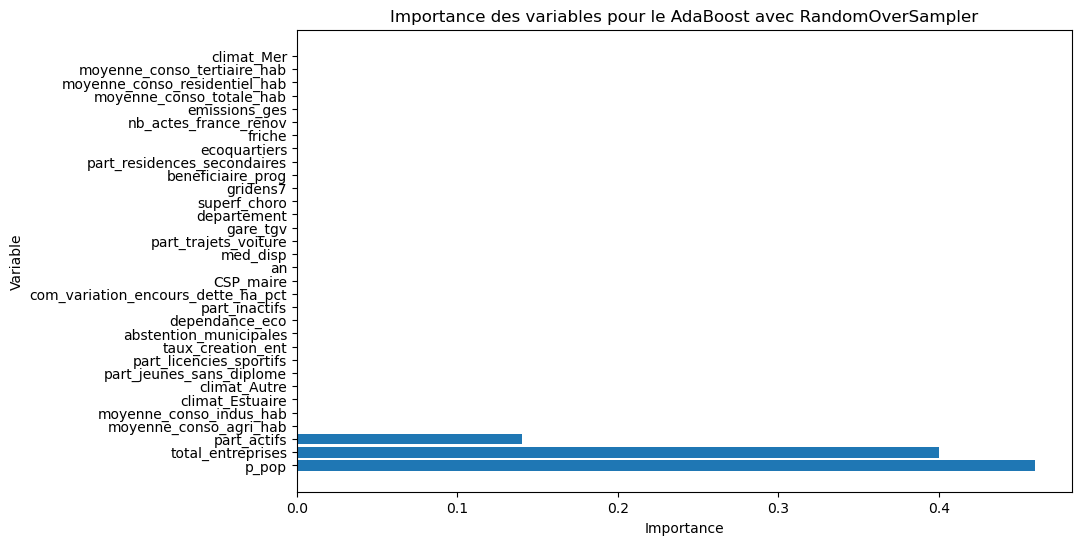

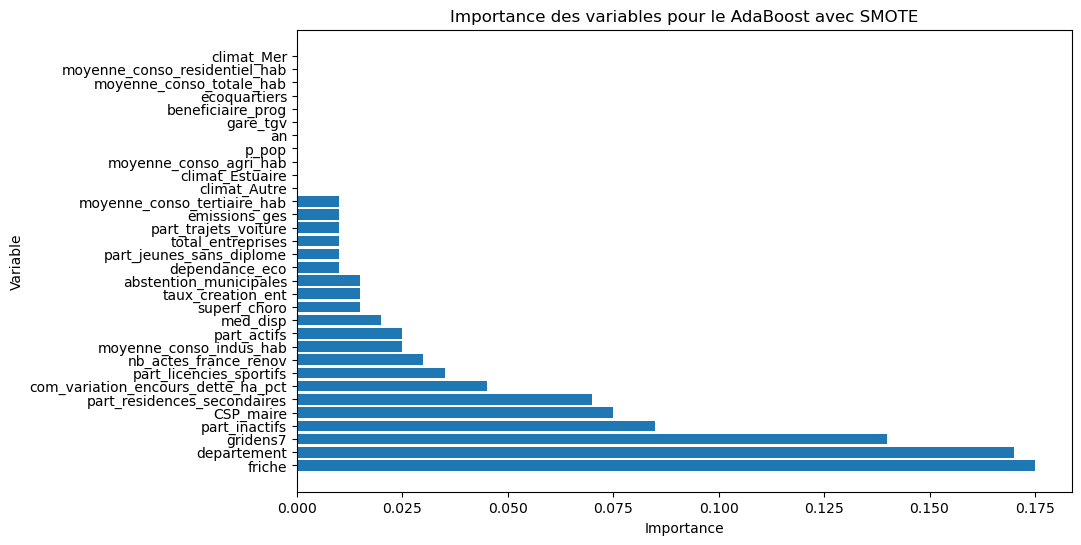

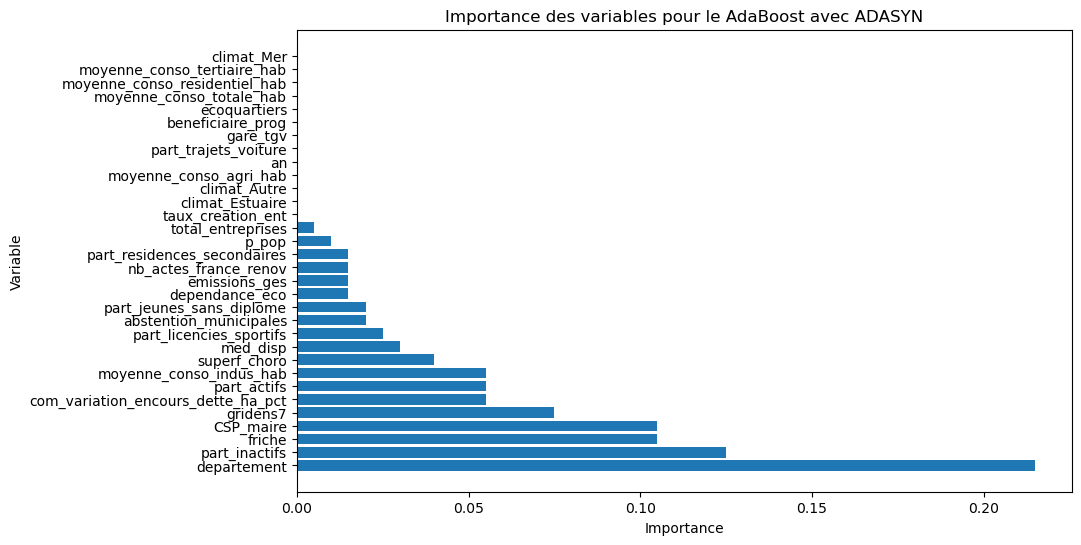

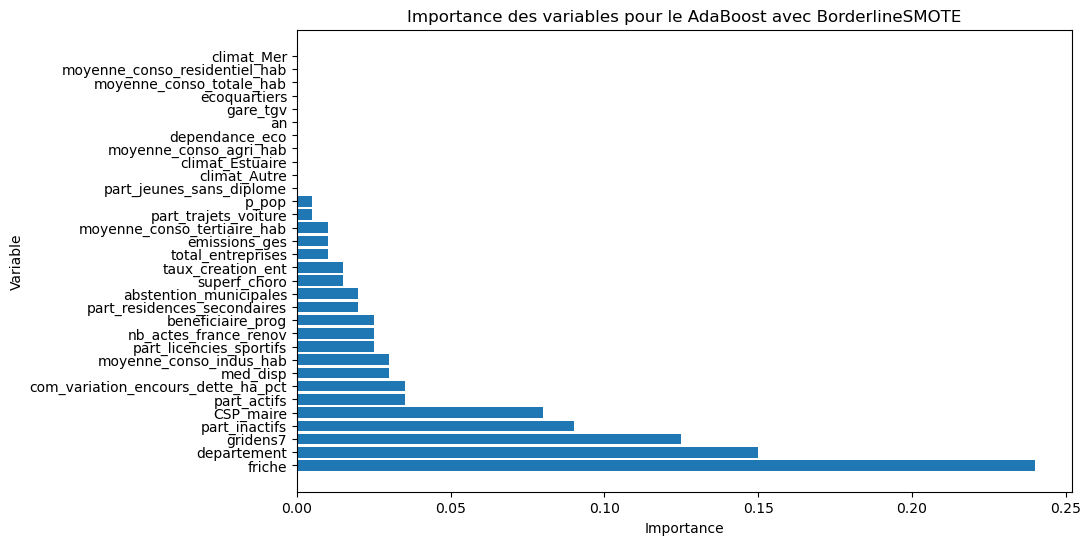

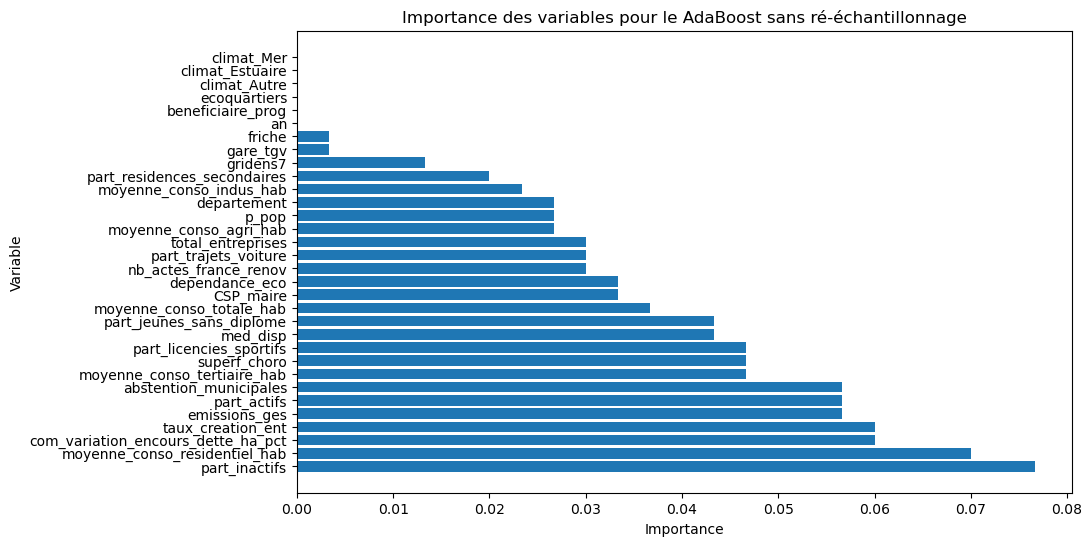

In [1308]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

### F) Ajustement hyperparamètres bis

In [1309]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Grilles de paramètres adaptées pour éviter le surapprentissage

param_grid_adaboost_oversampler_bis = {
    'oversampler__sampling_strategy': [0.5, 0.75, 1.0],  # Stratégies simplifiées pour échantillonnage
    'adaboost__n_estimators': [50, 100, 300],  # Réduction des options pour le nombre d'arbres
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  # Ajout d'une valeur plus basse pour learning_rate
}

param_grid_adaboost_smote_bis = {
    'smote__k_neighbors': [5, 7],  # Réduction des voisins pour SMOTE
    'smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_adasyn_bis = {
    'adasyn__n_neighbors': [5, 7], 
    'adasyn__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_borderline_smote_bis = {
    'borderline_smote__k_neighbors': [5, 7], 
    'borderline_smote__sampling_strategy': [0.5, 0.75, 1.0], 
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

param_grid_adaboost_bis = {
    'adaboost__n_estimators': [50, 100, 300], 
    'adaboost__learning_rate': [0.001, 0.01, 0.1],  
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [1310]:
grille_recherche_adaboost_randomoversampler_bis = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler_bis, cv=cv, scoring=scoring, refit='F1', n_jobs=-1, random_state=42)
grille_recherche_adaboost_smote_bis = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_adasyn_bis = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_borderline_smote_bis = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)
grille_recherche_adaboost_bis = RandomizedSearchCV(modele_adaboost, param_grid_adaboost_bis, cv=cv, scoring=scoring, refit='F1',n_jobs=-1,  random_state=42)

In [1311]:
modele_adaboost_randomoversampler_opt_bis = grille_recherche_adaboost_randomoversampler_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_smote_opt_bis = grille_recherche_adaboost_smote_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_adasyn_opt_bis = grille_recherche_adaboost_adasyn_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_borderline_smote_opt_bis = grille_recherche_adaboost_borderline_smote_bis.fit(X_train, y_train).best_estimator_
modele_adaboost_opt_bis = grille_recherche_adaboost_bis.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [1312]:
# Prévisions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt_bis.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt_bis.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt_bis.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt_bis.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt_bis.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt_bis.predict(X_test)

### G) Mesure performances bis

In [1313]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)

# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.642                0.582   
F1-score                                       0.103                0.252   
Balanced accuracy                              0.527                0.543   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.618                 0.651   
F1-score                                     0.302                 0.291   
Balanced accuracy                            0.586                 0.576   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.606  
F1-score                                   0.252  
Balanced accuracy                          0.539

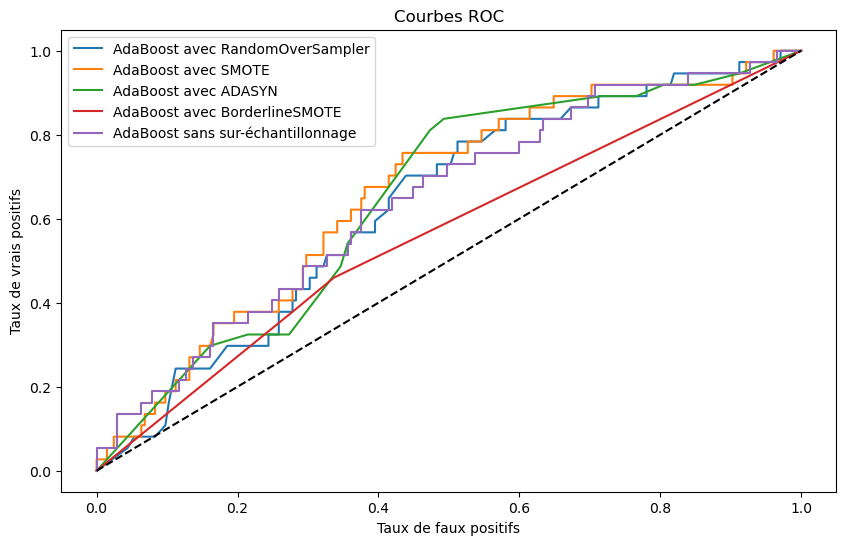

In [837]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

## I.5. Analyse mauvaises perf

# II. Kmeans

In [842]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_scaled, kmeanModel.labels_))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

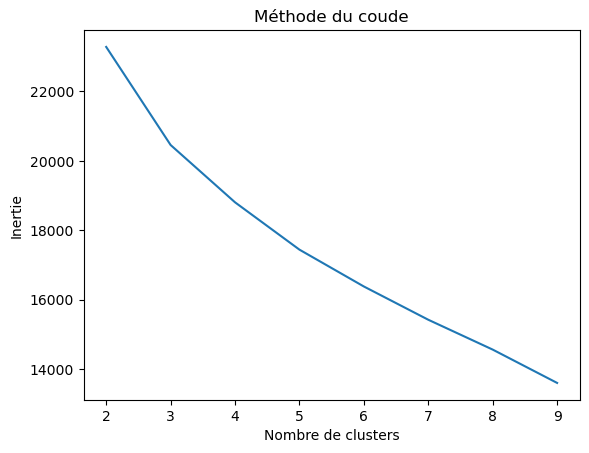

In [843]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

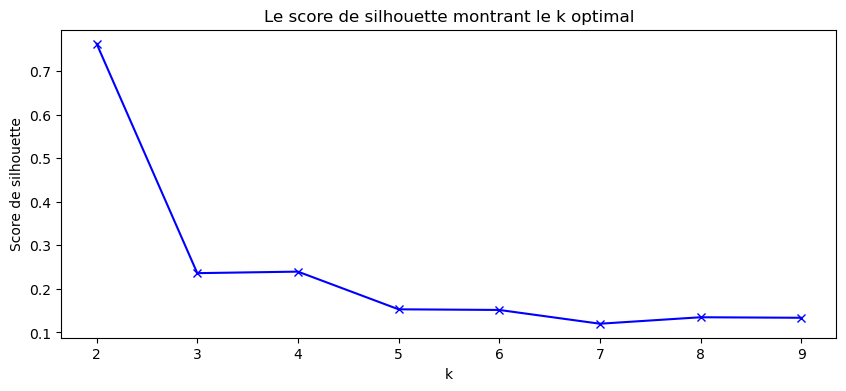

In [844]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [845]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [846]:
# Ajouter les labels de cluster au DataFrame
donnees['cluster_label'] = kmeans.labels_
donnees

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                  
22001                           0                2.994071   
22002                           0                1.283886   
22003                           0                0.000000   
22004                           0                0.200325   
22005                           0                0.121358   
...                           ...                     ...   
56260                           0                0.000681   
56261                           1                0.195613   
56262                           0                0.006094   
56263                           0                0.007602   
56264                           0                1.013565   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   
...                             ...                          ...   
56260                      0.520068                     2.439832   
56261                      9.267199                     1.455526   
56262                      0.052881                     0.387681   
56263                      0.084358                     0.755085   
56264                      3.746161                     0.242661   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   
...                                   ...                       ...   
56260                            2.641373                  5.627498   
56261                            3.289547                 14.230865   
56262                            3.643098                  4.106353   
56263                            2.451098                  3.311144   
56264                            3.914057                  8.940165   

            emissions_ges  nb_actes_france_renov  friche ecoquartiers  ...  \
code_insee                                                             ...   
22001               14871                     88       2            0  ...   
22002                8621                     38       0            0  ...   
22003                3028                     49       0            0  ...   
22004               29130                     46       6            0  ...   
22005                4136                     10       3            0  ...   
...                   ...                    ...     ...          ...  ...   
56260              133906                   1633      23            0  ...   
56261               76648                     52       2            0  ...   
56262                3704                    147       0            0  ...   
56263                6698                    160       0            0  ...   
56264                4215                     13       1            0  ...   

            dependance_eco abstention_municipales taux_creation_ent  \
code_insee                                                            
22001                  107                   17.4              15.0   
22002                   96                   53.8              12.1   
22003                  113                   53.7              36.7   
22004                  126            

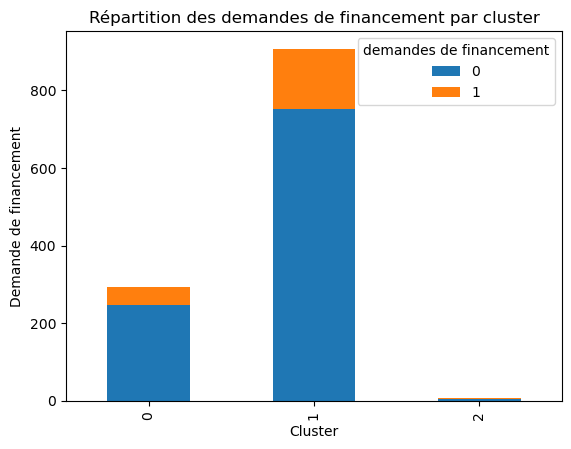

In [847]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(donnees['cluster_label'], donnees['beneficiaire_trans_eco'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Demande de financement')
plt.title('Répartition des demandes de financement par cluster')

# Afficher la légende
plt.legend(title='demandes de financement')

# Afficher le graphique
plt.show()

# II. Résultats

## II.1. Export des résultats

In [1347]:
len(X)

# Je veux récupérer toutes les probabilités associées à chaque observation avec adaboost et randomoversampler
toutes_probas_communes = modele_rf_adasyn_opt.predict_proba(X)[:, 1]
len(toutes_probas_communes)


1207

In [1348]:
# On récupère chaque probabilité associée à chaque commune

resultats_proba_communes = pd.DataFrame({
    "Code INSEE": X.index,
    "Probabilité": toutes_probas_communes
})
resultats_proba_communes

# Export du tableau
resultats_proba_communes.to_csv("data/resultats_proba_communes.csv", index=False)